# this shows some examples to load and plot the paired sessions data

In [18]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d



In [19]:
LoadDatafile = "/Users/Erfan/Desktop/Representational Drift/Ca1 Xin Data /WeekLearningData.npz"

with np.load(LoadDatafile,allow_pickle=True) as data:
    AllSerialdffData = data['AlltaskdffSerial'][()]
    AllVRonPeriodData = data['VRonPeriodData'][()]
    AllContextWiseBehav = data['AllContextWiseBehav'][()]
    AllPairTVDatas = data['AllPairTVDatas'][()]
    PairedSessDays = data['PairedSessDays'][()]
    SponLastSess_serialDff = data['SponSessDffTrace'][()]
    SponBehavSerials = data['SponBehavSerial'][()]

# LoadDatafile2 = "/Users/Erfan/Desktop/Representational Drift/Ca1 Xin Data /WeekLearningData_ROIloc.npz"
# with np.load(LoadDatafile2,allow_pickle=True) as data2:
#     AllPairROIcenter = data2['AllSessROIcents'][()] # this contains the center loc for all ROIs, each 
#     AllPairROIpixels = data2['AllSessROIPixels'][()]


In [20]:
# for example, if you want the upper half of ROIs in session 1, you can simply use
UsedROIInds = AllPairROIcenter[0][:,0] <= 256 # because the frame size is 512

# reconstruct the whole ROI masks for session 1
Sess1ROIpixels = AllPairROIpixels[0]
RawROImasks = np.zeros((512,512),dtype='float64')
RawROIIndex = np.zeros((512,512),dtype='float64')
MaskColorvalues = np.random.rand(len(Sess1ROIpixels))
for cR in range(len(Sess1ROIpixels)):
    cRpixels = Sess1ROIpixels[cR]
    numofPixels = len(cRpixels['xpix'])
    for cpixel in range(numofPixels):
        RawROImasks[cRpixels['ypix'][cpixel],cRpixels['xpix'][cpixel]] = MaskColorvalues[cR]
        RawROIIndex[cRpixels['ypix'][cpixel],cRpixels['xpix'][cpixel]] = cR

   

NameError: name 'AllPairROIcenter' is not defined

In [ ]:
# visualize the ROI masks for all used ROIs
masked_data = np.ma.masked_array(RawROImasks, mask=RawROIIndex==0)
plt.imshow(masked_data,vmin=0,vmax=1,cmap='cool') 

NameError: name 'RawROImasks' is not defined

Current session is Day 1


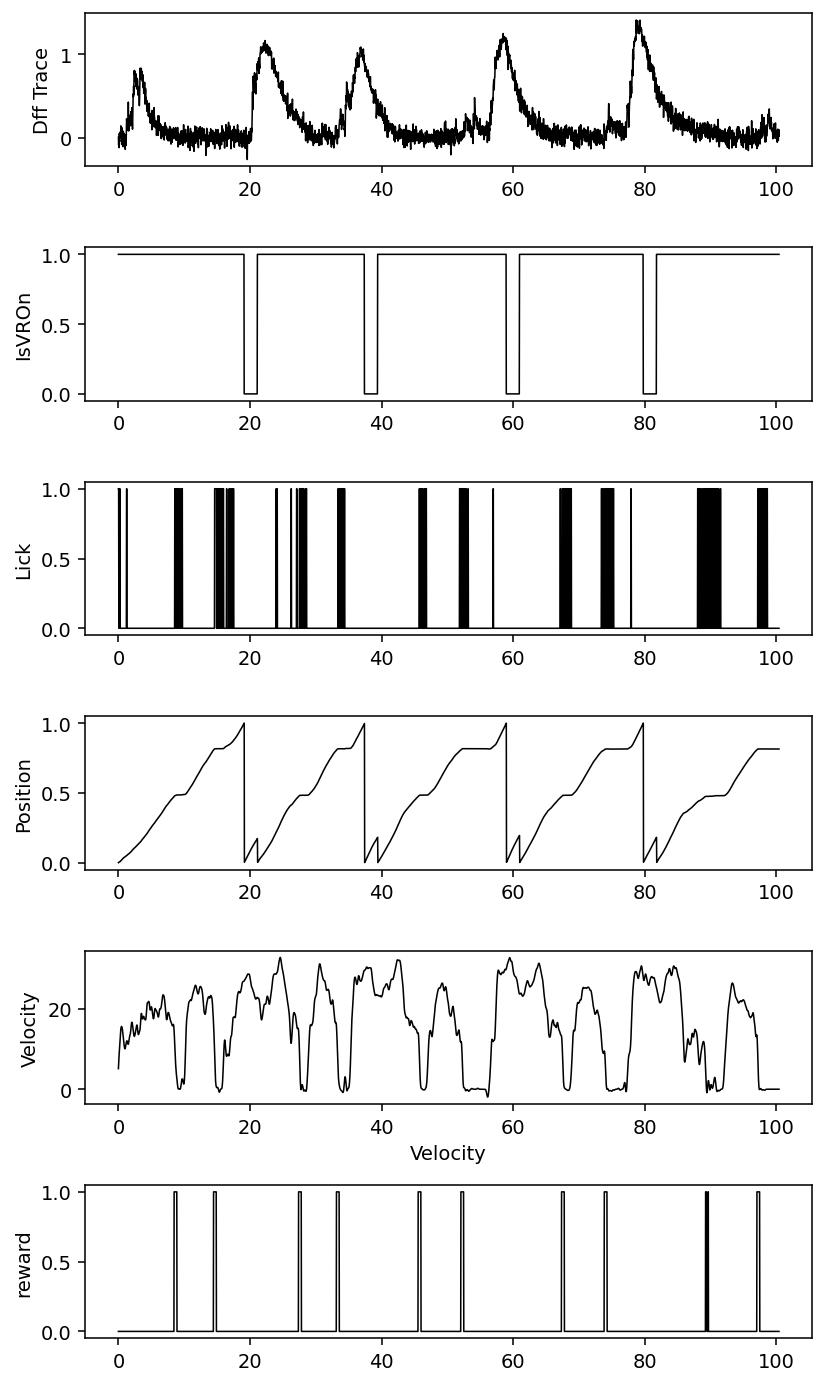

In [ ]:
fr = 29.8739

CheckSessIndex = 0
SessDayStr = PairedSessDays[CheckSessIndex]
print(f"Current session is Day {SessDayStr}")
cSessData = AllSerialdffData[CheckSessIndex]

PlotRange=3000 # only plot the first 3000 frametime events
Frametimes = np.arange(0,PlotRange)/fr
cDataStr = ["Dff Trace","IsVROn","Lick","Position","Velocity","reward"]
fig330, ax030 = plt.subplots(nrows=len(cDataStr), ncols=1, figsize=(6,10),dpi=140)
for cInds in range(6):
    cData = cSessData[cInds]
    if cData.ndim > 1:
        ax030[cInds].plot(Frametimes,cData[0,0:PlotRange],'k',lw=0.8) # plot the first ROI as example
    else:
        ax030[cInds].plot(Frametimes,cData[0:PlotRange],'k',lw=0.8)
    ax030[cInds].set_ylabel(cDataStr[cInds])
    if cInds == 4: # last plot add xlabel
        ax030[cInds].set_xlabel(cDataStr[cInds])

plt.tight_layout()

Current session is Spontaneous recording at Day 10


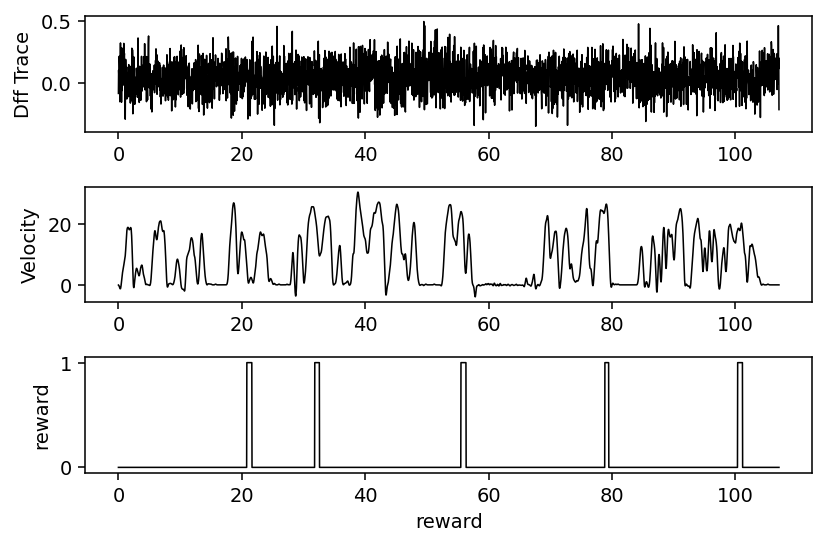

In [ ]:
# VR off Sponteneous conditions at day 10

fr = 29.8739

print(f"Current session is Spontaneous recording at Day 10")

PlotRange=3200 # only plot the first 3000 frametime events
Frametimes = np.arange(0,PlotRange)/fr
PlotDatas = [SponLastSess_serialDff,SponBehavSerials[0],SponBehavSerials[1]]
cDataStr = ["Dff Trace","Velocity","reward"]
Numofplots = len(PlotDatas)
fig3302, ax0302 = plt.subplots(nrows=Numofplots, ncols=1, figsize=(6,4),dpi=140)
for cInds in range(Numofplots):
    cData = PlotDatas[cInds]
    if cData.ndim > 1:
        ax0302[cInds].plot(Frametimes,cData[2,0:PlotRange],'k',lw=0.8) # plot the first ROI as example
    else:
        ax0302[cInds].plot(Frametimes,cData[0:PlotRange],'k',lw=0.8)
    ax0302[cInds].set_ylabel(cDataStr[cInds])
    if cInds == Numofplots-1: # last plot add xlabel
        ax0302[cInds].set_xlabel(cDataStr[cInds])

plt.tight_layout()

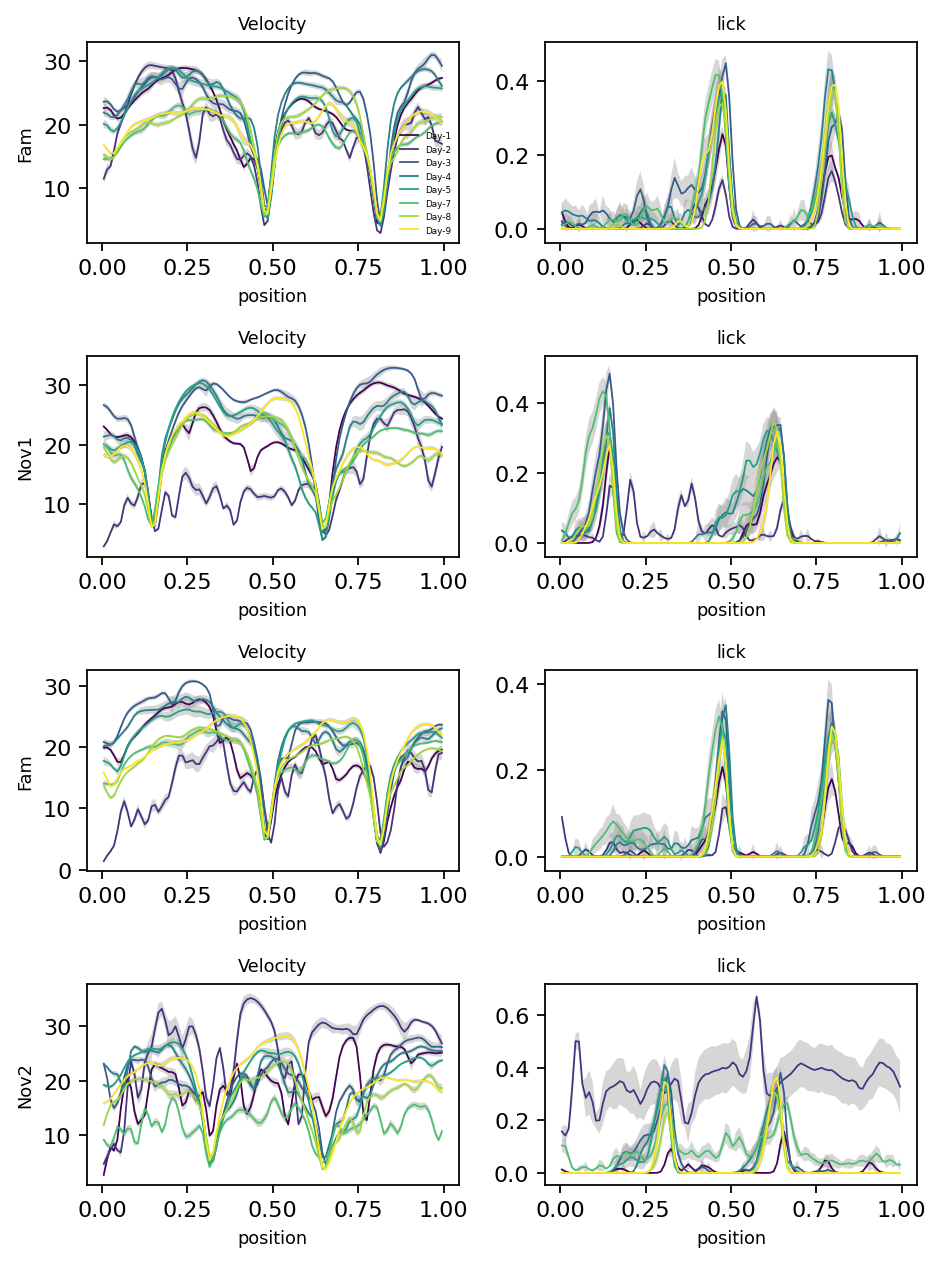

In [ ]:
# this is to show that there is no significant learning effect at least for the familiar context
nBins = 100
LocBins = np.linspace(0.0,1.0,nBins+1)

fig32, ax02 = plt.subplots(nrows=4, ncols=2, figsize=(6,8),dpi=160)

UsedInds = np.array([0,1,2,3,4,6,7,8],dtype='int')
cmap = plt.get_cmap('viridis')
laplineColors = cmap(np.linspace(0,1,len(UsedInds)))
spbincents = (LocBins[:-1]+LocBins[1:])/2

PlotData = 0 # 0 indicates Velocity, 1 indicates licks, 2 indicates reward
PlotDataStr = ['Velocity','lick']
cContext = 0 # only plot the first familiar context sections at here, you can change it to plot the other section, range from 0-3
ContextStrs = ['Fam','Nov1','Fam','Nov2']

k = 0
for cData in range(2):
    for cContext in range(4):
        cax = ax02[cContext,cData]
        for Inds,Days in enumerate(UsedInds):
            cSessData = AllContextWiseBehav[Inds][cContext][cData]
            SmoothedTrace = gaussian_filter1d(cSessData[0],1)
            cax.fill_between(spbincents,SmoothedTrace-cSessData[1],SmoothedTrace+cSessData[1],
                        alpha=0.4,ec='none',fc=[0.6,0.6,0.6])
            cax.plot(spbincents,SmoothedTrace,lw=0.8,color=laplineColors[Inds],label=f"Day-{Days+1}")
        if cData%2 == 0:
            cax.set_title(f"{PlotDataStr[cData]}",fontsize=8)
            cax.set_ylabel(f"{ContextStrs[cContext]}",fontsize=8)
            cax.set_xlabel("position",fontsize=8)
        else:
            cax.set_title(f"{PlotDataStr[cData]}",fontsize=8)
            cax.set_xlabel("position",fontsize=8)
        k += 1
ax02[0,0].legend(fontsize=4,loc='best',shadow=None,frameon=False)
plt.tight_layout()

In [ ]:
# I also add the stimulation session data
# there are two sets of data prepared for you, 
# the first set, named as "StimSessData_paired2Day1.npz" and "StimSessData_ROIloc_paired2Day1.npz"
#                Contains the same variables as the old dataset, you can use the previous code to load them
#                The only difference is that current data has three sessions of data, corresponding to day1, day 12 and day 13.
#                The day 12 and day 13 sessions are "optical stimulation" sessions, you could find a new variable named "PairedoptoCellinds"
#                that contains the indices of cells are the target cells and being stimulated from lap5 to lap10.
#                This dataset is paired with the same 305 cells in the old dataset

# Another set, named as "StimSessData_SelfPair.npz" and "StimSessData_ROIloc_SelfPair.npz"
#              they have the same contains as "StimSessData_paired2Day1.npz" and "StimSessData_ROIloc_paired2Day1.npz"
#              The difference is that this dataset was paired within itself, so it will have different number of cells as old dataset,
#              But contans all available ROIs for these three sessions


Erfan test

In [23]:
import numpy as np

# Choose subset
subset_data = AllSerialdffData[:2]  # first two sessions
subset_days = PairedSessDays[:2]    # matching session labels

# Save to file
np.savez_compressed("familiar_subset.npz", AllSerialdffData=subset_data, PairedSessDays=subset_days)

print("Saved: familiar_subset.npz")


Saved: familiar_subset.npz


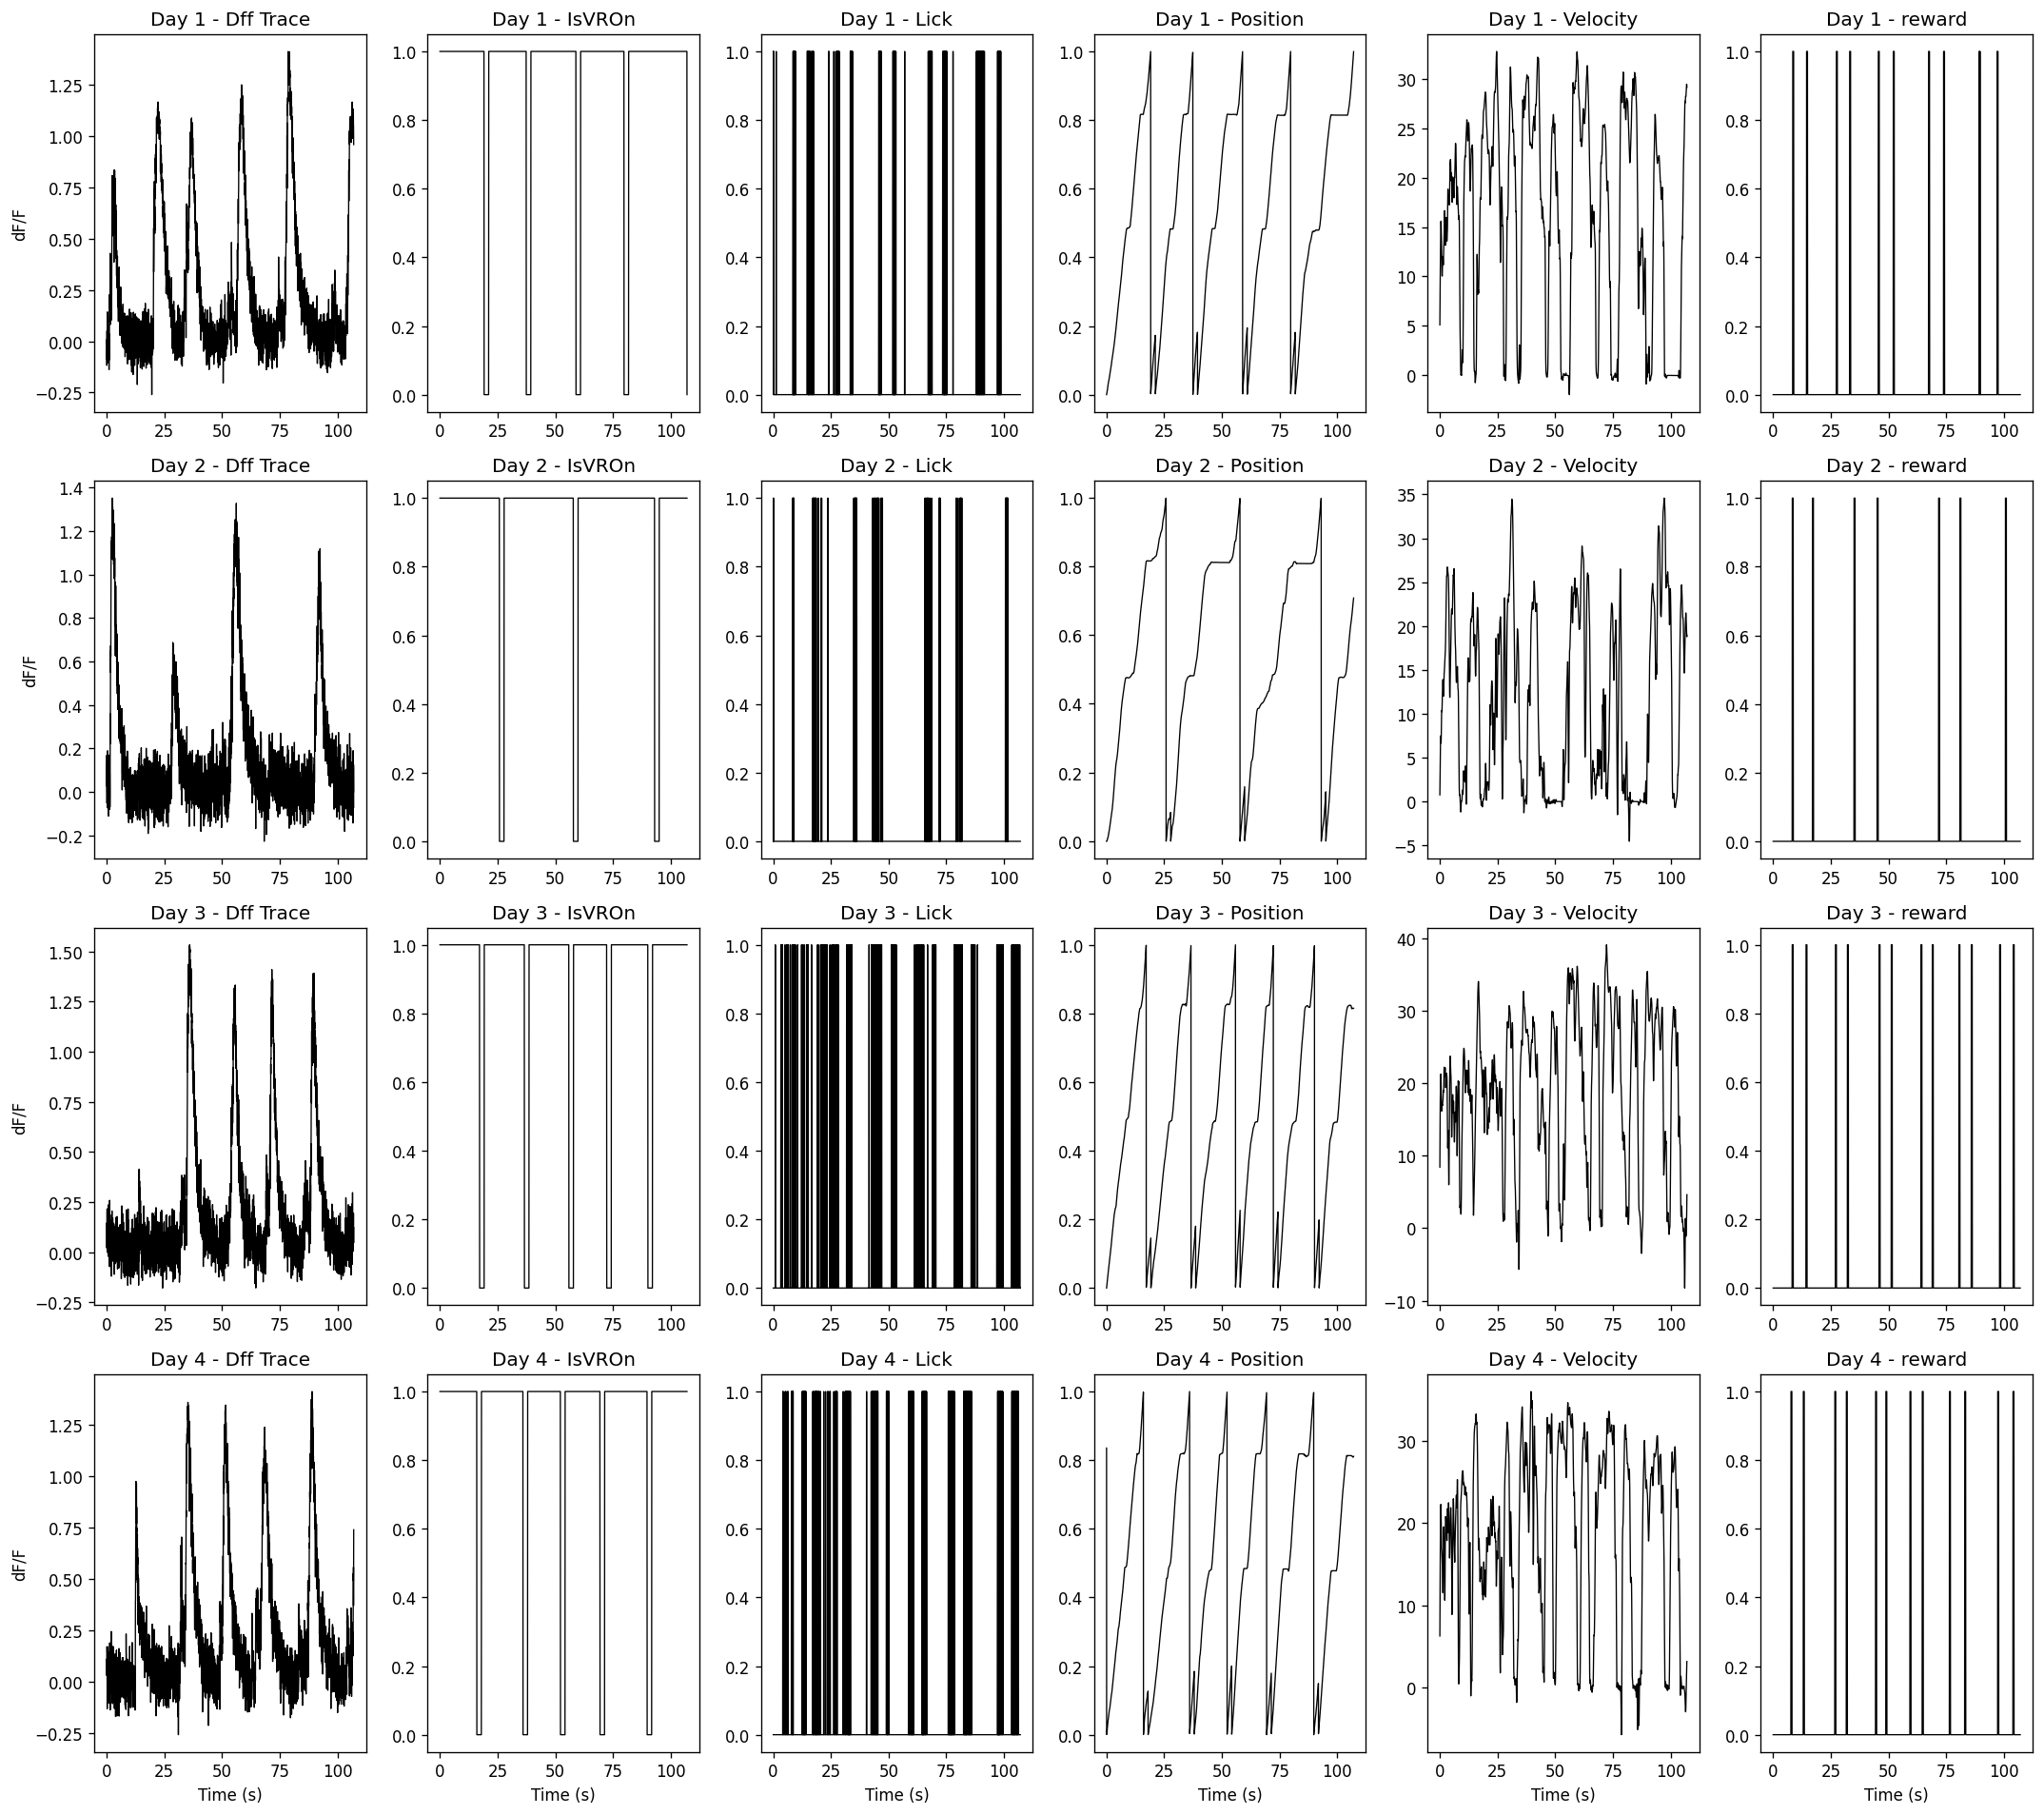

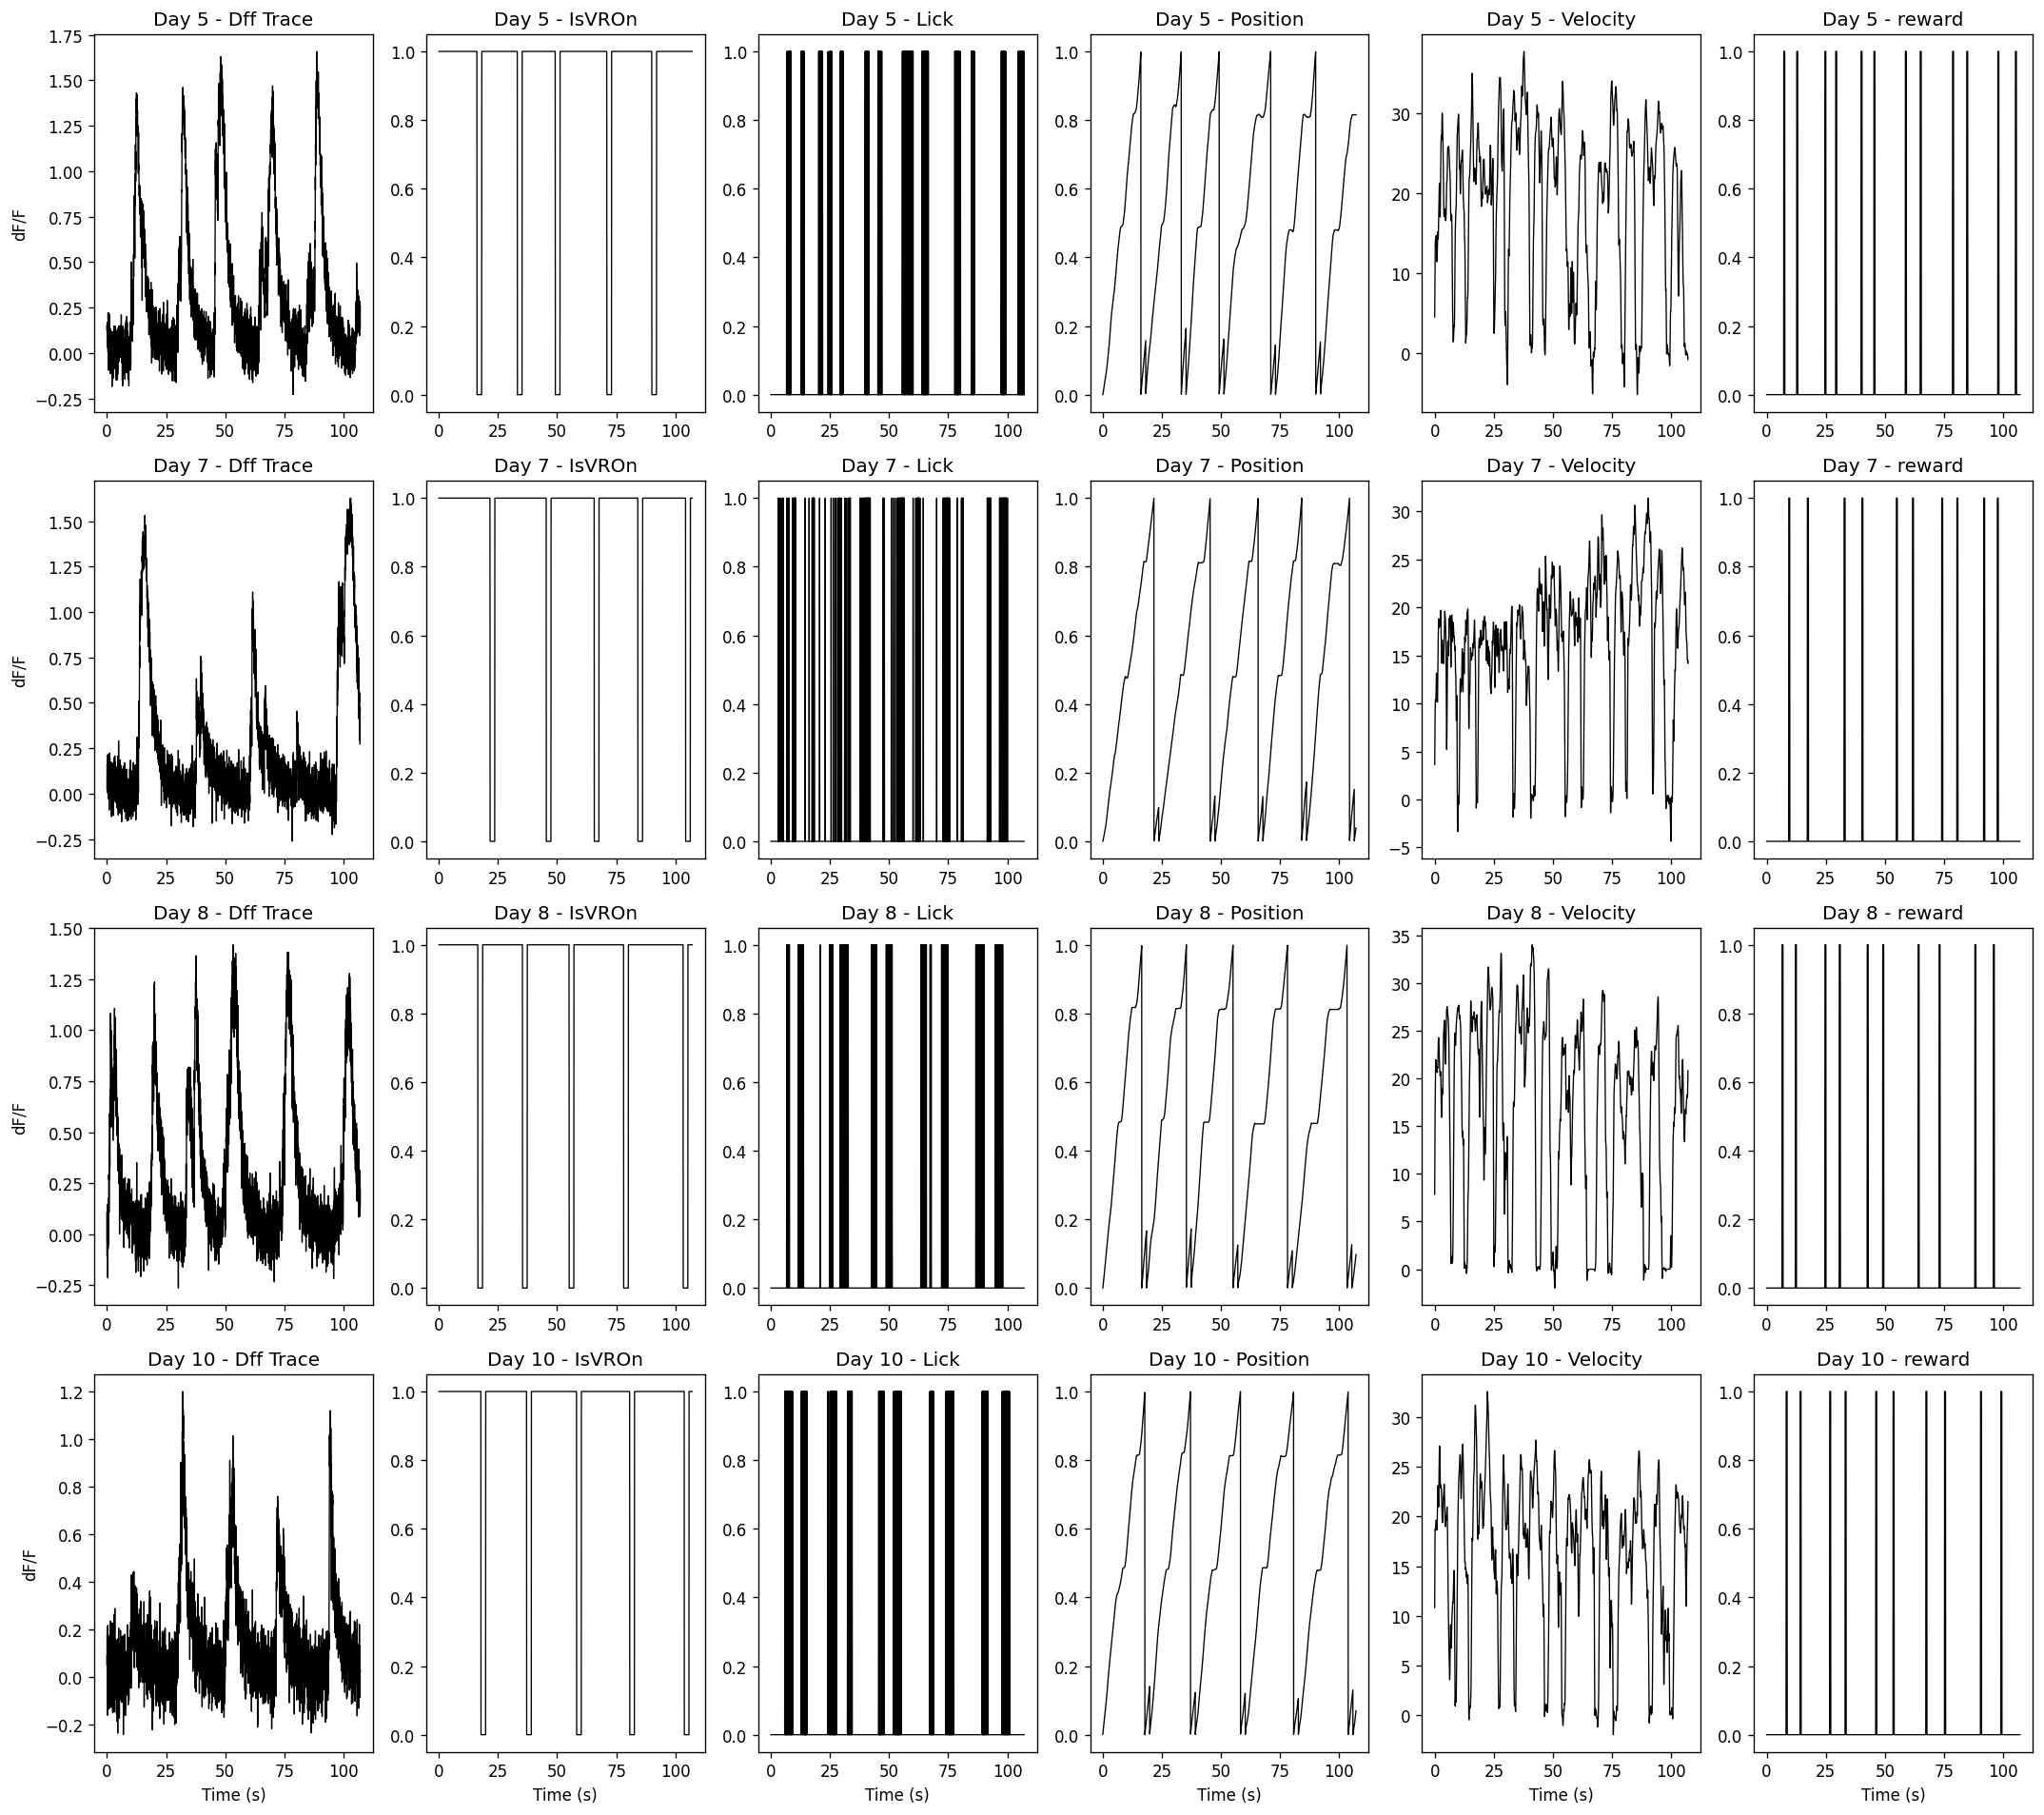

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume you already loaded these:
# AllSerialdffData = data['AlltaskdffSerial'][()]
# PairedSessDays = data['PairedSessDays'][()]

fr = 29.8739
PlotRange = 3200
Frametimes = np.arange(0, PlotRange) / fr
cDataStr = ["Dff Trace", "IsVROn", "Lick", "Position", "Velocity", "reward"]

# Number of sessions
n_sessions = len(AllSerialdffData)

# Group how many sessions you want per figure
sessions_per_fig = 4  # change if you want more or fewer per page

for start_idx in range(0, n_sessions, sessions_per_fig):
    end_idx = min(start_idx + sessions_per_fig, n_sessions)
    num_sessions_in_fig = end_idx - start_idx

    fig, axes = plt.subplots(num_sessions_in_fig, 6, figsize=(18, 4 * num_sessions_in_fig), dpi=120)
    if num_sessions_in_fig == 1:
        axes = np.expand_dims(axes, axis=0)  # Ensure axes always 2D array even if one session

    for sess_idx_in_fig, global_idx in enumerate(range(start_idx, end_idx)):
        session_data = AllSerialdffData[global_idx]
        session_day = PairedSessDays[global_idx]
        
        for signal_idx in range(6):
            cData = session_data[signal_idx]
            ax = axes[sess_idx_in_fig, signal_idx]
            if cData.ndim > 1:
                ax.plot(Frametimes, cData[0, :PlotRange], 'k', lw=0.8)  # Only plot first ROI
            else:
                ax.plot(Frametimes, cData[:PlotRange], 'k', lw=0.8)
            ax.set_title(f"Day {session_day} - {cDataStr[signal_idx]}")
            if sess_idx_in_fig == num_sessions_in_fig-1:
                ax.set_xlabel("Time (s)")
            if signal_idx == 0:
                ax.set_ylabel("dF/F")

    plt.tight_layout()
    plt.show()


In [ ]:
# Quick way to print number of neurons per day:
for sess_idx, sess_data in enumerate(AllSerialdffData):
    n_neurons = sess_data[0].shape[0]
    print(f"Session {sess_idx} (Day {PairedSessDays[sess_idx]}): {n_neurons} neurons")


Session 0 (Day 1): 305 neurons
Session 1 (Day 2): 305 neurons
Session 2 (Day 3): 305 neurons
Session 3 (Day 4): 305 neurons
Session 4 (Day 5): 305 neurons
Session 5 (Day 7): 305 neurons
Session 6 (Day 8): 305 neurons
Session 7 (Day 10): 305 neurons


Analyzing session: Day 1
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 2
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 3
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 4
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 5
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 7
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 8
Detected 305 place cells out of 305 neurons.
Analyzing session: Day 10
Detected 305 place cells out of 305 neurons.


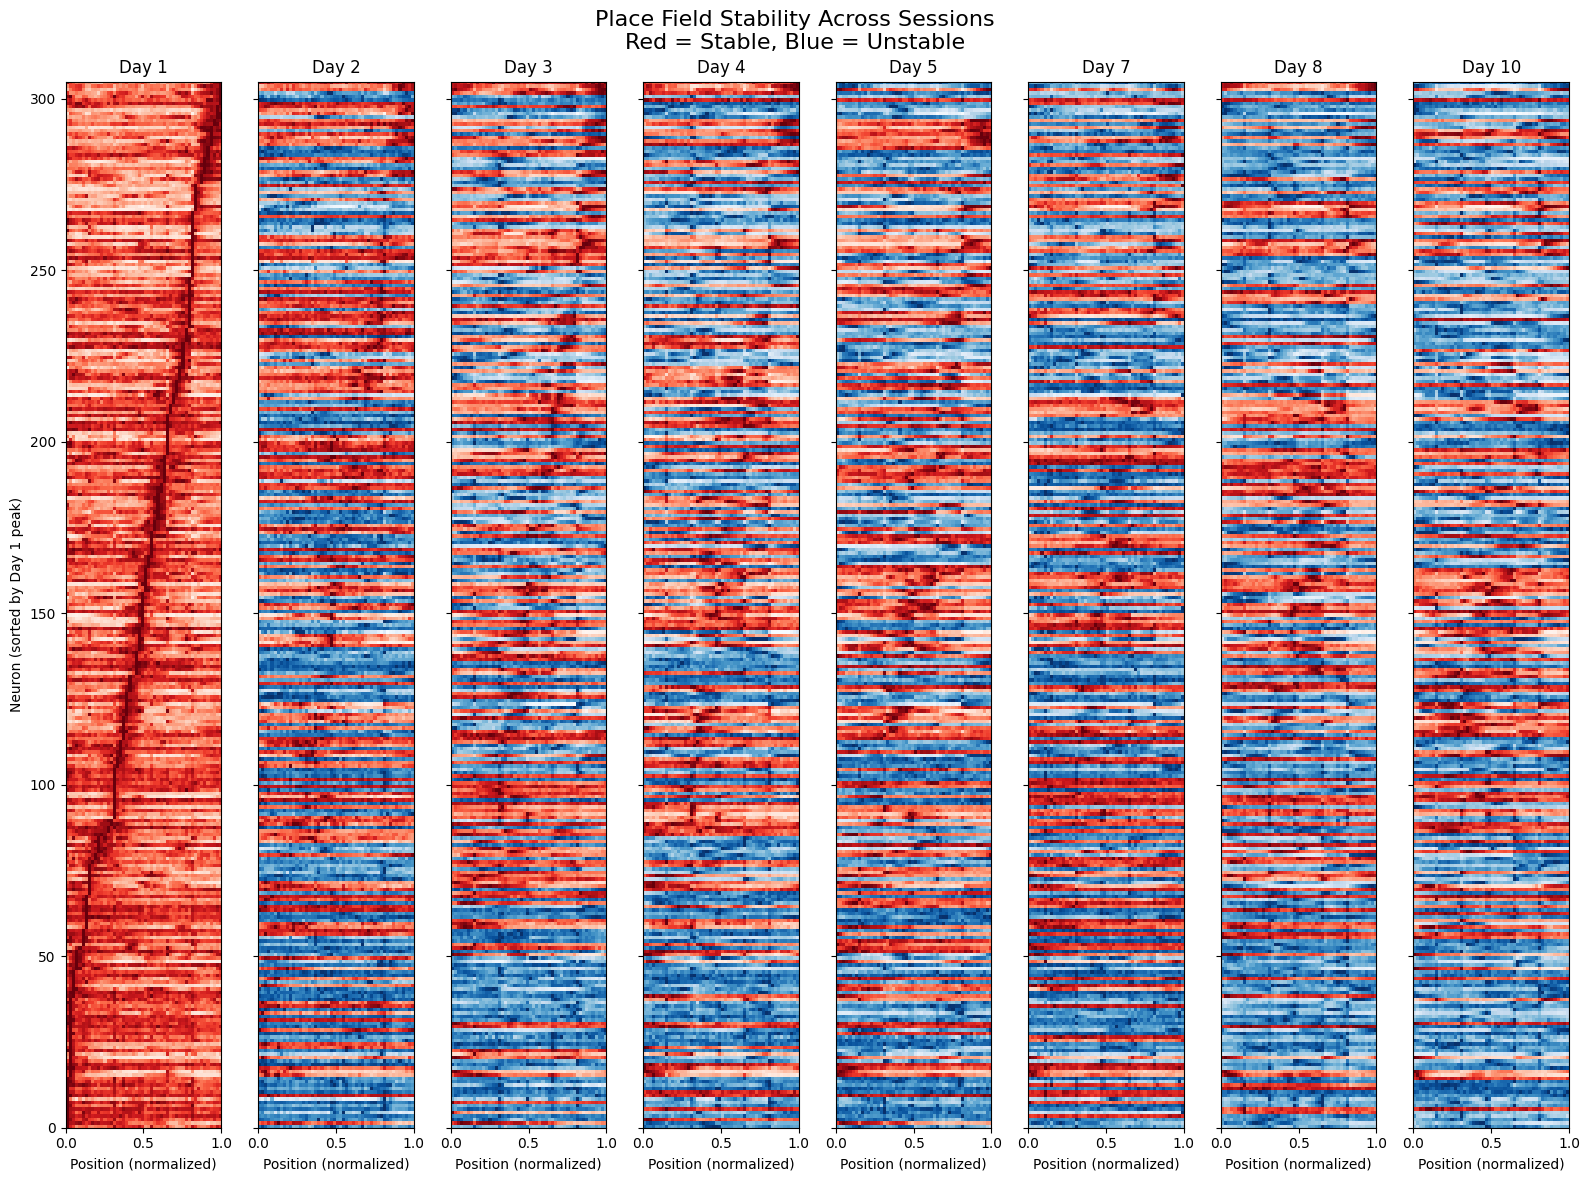

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fr = 29.8739  # frame rate
threshold = 0.2  # dF/F threshold for calcium event detection
n_bins = 50  # number of spatial bins
place_cell_selectivity_factor = 2.0  # threshold for place cell detection
peak_shift_thresh = 0.2  # max allowed peak shift (in normalized space)

# Storage for cross-session comparison
all_normalized_maps = []
all_peak_locations = []
all_place_cell_flags = []

# For all sessions
for session_idx in range(len(AllSerialdffData)):
    cSessData = AllSerialdffData[session_idx]
    SessDayStr = PairedSessDays[session_idx]
    print(f"Analyzing session: Day {SessDayStr}")

    # Extract signals
    dff_traces = cSessData[0]         # [n_neurons x timepoints]
    is_vr_on = cSessData[1]           # [timepoints]
    position = cSessData[3]           # [timepoints]

    # Only keep VR ON periods
    valid_mask = is_vr_on > 0
    dff_traces_valid = dff_traces[:, valid_mask]
    position_valid = position[valid_mask]

    # Detect "calcium events"
    events = (dff_traces_valid > threshold).astype(int)

    # Bin position
    position_bins = np.linspace(0, 1, n_bins + 1)
    bin_centers = (position_bins[:-1] + position_bins[1:]) / 2

    n_neurons = dff_traces.shape[0]
    event_map = np.zeros((n_neurons, n_bins))
    occupancy = np.zeros(n_bins)

    # Compute occupancy
    for b in range(n_bins):
        bin_mask = (position_valid >= position_bins[b]) & (position_valid < position_bins[b+1])
        occupancy[b] = np.sum(bin_mask) / fr  # time in seconds

    occupancy[occupancy == 0] = np.nan  # avoid division by zero

    # Compute event rate map
    for neuron_idx in range(n_neurons):
        for b in range(n_bins):
            bin_mask = (position_valid >= position_bins[b]) & (position_valid < position_bins[b+1])
            n_events = np.sum(events[neuron_idx, bin_mask])
            event_map[neuron_idx, b] = n_events

    event_rate_map = event_map / occupancy[np.newaxis, :]  # neurons x bins

    # Place cell detection
    peak_rate = np.nanmax(event_rate_map, axis=1)
    median_rate = np.nanmedian(event_rate_map, axis=1)
    is_place_cell = peak_rate > 0.5*(place_cell_selectivity_factor * median_rate)

    print(f"Detected {np.sum(is_place_cell)} place cells out of {n_neurons} neurons.")

    # Normalize and store
    normalized_event_rate_map = event_rate_map / (np.nanmax(event_rate_map, axis=1, keepdims=True) + 1e-9)
    peak_locations = np.nanargmax(normalized_event_rate_map, axis=1)

    all_normalized_maps.append(normalized_event_rate_map)
    all_peak_locations.append(peak_locations)
    all_place_cell_flags.append(is_place_cell)

# --- Final Longitudinal Plot (Reference-based Sorting & Stability) ---

ref_day = 0
ref_pc_mask = all_place_cell_flags[ref_day]
ref_peak_locs = all_peak_locations[ref_day][ref_pc_mask]
ref_sorted_indices = np.argsort(ref_peak_locs)
ref_place_cell_indices = np.where(ref_pc_mask)[0][ref_sorted_indices]

n_sessions = len(AllSerialdffData)
fig, axes = plt.subplots(1, n_sessions, figsize=(16, 12), sharey=True)

for sess_idx in range(n_sessions):
    ax = axes[sess_idx]
    norm_map = all_normalized_maps[sess_idx][ref_place_cell_indices, :]
    curr_peaks = all_peak_locations[sess_idx][ref_place_cell_indices]
    is_pc = all_place_cell_flags[sess_idx][ref_place_cell_indices]

    peak_diff = np.abs(curr_peaks - all_peak_locations[ref_day][ref_place_cell_indices])
    is_stable = (peak_diff < (peak_shift_thresh * n_bins)) & is_pc
    is_unstable = (~is_stable) & is_pc

    # Plot stable (red)
    stable_map = np.full_like(norm_map, np.nan)
    stable_map[is_stable, :] = norm_map[is_stable, :]
    ax.imshow(stable_map, aspect='auto', cmap='Reds', extent=[0, 1, 0, len(ref_place_cell_indices)], origin='lower')

    # Plot unstable (blue)
    unstable_map = np.full_like(norm_map, np.nan)
    unstable_map[is_unstable, :] = norm_map[is_unstable, :]
    ax.imshow(unstable_map, aspect='auto', cmap='Blues', extent=[0, 1, 0, len(ref_place_cell_indices)], origin='lower')

    ax.set_title(f"Day {PairedSessDays[sess_idx]}")
    ax.set_xlabel("Position (normalized)")
    if sess_idx == 0:
        ax.set_ylabel("Neuron (sorted by Day 1 peak)")

fig.suptitle("Place Field Stability Across Sessions\nRed = Stable, Blue = Unstable", fontsize=16)
plt.tight_layout()
plt.show()



extract data for Destin ODE

Try context specific

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Parameters
fr = 29.8739
threshold = 0.2
n_bins = 50
place_cell_selectivity_factor = 2.0
peak_shift_thresh = 0.2
smoothing_sigma = 1
context_to_use = 0  # Only analyze Familiar context

# Bin setup
position_bins = np.linspace(0, 1, n_bins + 1)
bin_centers = (position_bins[:-1] + position_bins[1:]) / 2

# Outputs
all_normalized_maps = []
all_peak_locations = []
all_place_cell_flags = []

for session_idx, cSessData in enumerate(AllSerialdffData):
    dff = cSessData[0]
    is_vr_on = cSessData[1]
    position = cSessData[3]
    trial_mask = cSessData[5].astype(bool)

    # Trial segmentation
    trial_starts = np.where(np.diff(trial_mask.astype(int)) == 1)[0] + 1
    trial_ends = np.where(np.diff(trial_mask.astype(int)) == -1)[0] + 1
    if trial_mask[0]: trial_starts = np.insert(trial_starts, 0, 0)
    if trial_mask[-1]: trial_ends = np.append(trial_ends, len(trial_mask))

    n_trials = min(len(trial_starts), len(trial_ends))

    # Generate block-wise context labels per 15 trials
    block_pattern = [0, 1, 0, 2]
    labels = []
    while len(labels) < n_trials:
        for ctx in block_pattern:
            labels.extend([ctx] * 15)
    context_labels_this_session = labels[:n_trials]

    # Frame-wise context assignment
    context_per_frame = np.full_like(is_vr_on, -1, dtype=int)
    for i in range(n_trials):
        context_per_frame[trial_starts[i]:trial_ends[i]] = context_labels_this_session[i]

    # Context-specific filtering
    valid_mask = (is_vr_on > 0) & (context_per_frame == context_to_use)
    dff_valid = dff[:, valid_mask]
    pos_valid = position[valid_mask]

    # Re-normalize position within valid frames
    pos_min = np.nanmin(pos_valid)
    pos_max = np.nanmax(pos_valid)
    pos_valid = (pos_valid - pos_min) / (pos_max - pos_min + 1e-9)

    events = (dff_valid > threshold).astype(int)
    n_neurons = dff.shape[0]
    event_map = np.zeros((n_neurons, n_bins))
    occupancy = np.zeros(n_bins)

    for b in range(n_bins):
        bin_mask = (pos_valid >= position_bins[b]) & (pos_valid < position_bins[b + 1])
        occupancy[b] = np.sum(bin_mask) / fr
        for n in range(n_neurons):
            event_map[n, b] = np.sum(events[n, bin_mask])

    occupancy[occupancy == 0] = np.nan
    rate_map = event_map / occupancy[np.newaxis, :]
    norm_map = rate_map / (np.nanmax(rate_map, axis=1, keepdims=True) + 1e-9)
    smoothed_map = gaussian_filter1d(norm_map, sigma=smoothing_sigma, axis=1)

    peak_vals = np.nanmax(smoothed_map, axis=1)
    median_vals = np.nanmedian(smoothed_map, axis=1)
    is_place_cell = peak_vals > 0.5 * (place_cell_selectivity_factor * median_vals)

    all_normalized_maps.append(smoothed_map)
    all_peak_locations.append(np.nanargmax(smoothed_map, axis=1))
    all_place_cell_flags.append(is_place_cell)

# ---------------------
# Visualization
# ---------------------
ref_idx = 0
ref_mask = all_place_cell_flags[ref_idx]
ref_sorted = np.argsort(all_peak_locations[ref_idx][ref_mask])
ref_indices = np.where(ref_mask)[0][ref_sorted]
n_cells = len(ref_indices)
n_sessions = len(AllSerialdffData)

fig, axes = plt.subplots(1, n_sessions, figsize=(2.5 * n_sessions, 10), sharey=True)
for sess_idx in range(n_sessions):
    ax = axes[sess_idx]
    current_map = all_normalized_maps[sess_idx][ref_indices, :]
    current_peaks = all_peak_locations[sess_idx][ref_indices]
    current_mask = all_place_cell_flags[sess_idx][ref_indices]
    ref_peaks = all_peak_locations[ref_idx][ref_indices]

    peak_diff = np.abs(current_peaks - ref_peaks)
    is_stable = (peak_diff < (peak_shift_thresh * n_bins)) & current_mask
    is_unstable = (~is_stable) & current_mask

    stable_map = np.full_like(current_map, np.nan)
    unstable_map = np.full_like(current_map, np.nan)
    stable_map[is_stable, :] = current_map[is_stable, :]
    unstable_map[is_unstable, :] = current_map[is_unstable, :]

    ax.imshow(stable_map, cmap='Reds', aspect='auto', extent=[0, 1, 0, n_cells], origin='lower')
    ax.imshow(unstable_map, cmap='Blues', aspect='auto', extent=[0, 1, 0, n_cells], origin='lower')
    ax.set_title(f"Day {PairedSessDays[sess_idx]}")
    ax.set_xlabel("Position (norm)")
    if sess_idx == 0:
        ax.set_ylabel("Neuron (sorted by Day 1)")

fig.suptitle("Familiar Context Only — Place Field Stability", fontsize=16)
plt.tight_layout()
plt.show()


/var/folders/zl/dq7c13p16bsb4qhmx8fvgp2m0000gn/T/ipykernel_37940/911407349.py:76: RuntimeWarning: All-NaN slice encountered
  peak_vals = np.nanmax(smoothed_map, axis=1)
/var/folders/zl/dq7c13p16bsb4qhmx8fvgp2m0000gn/T/ipykernel_37940/911407349.py:77: RuntimeWarning: All-NaN slice encountered
  median_vals = np.nanmedian(smoothed_map, axis=1)


ValueError: All-NaN slice encountered

only one context

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import pearsonr

# Parameters
fr = 29.8739
threshold = 0.2
n_bins = 50
place_cell_selectivity_factor = 1.5  # use stricter version later
peak_shift_thresh = 0.4
smoothing_sigma = 1
context_to_use = 0  # Familiar context

# Bin definitions
position_bins = np.linspace(0, 1, n_bins + 1)
bin_centers = (position_bins[:-1] + position_bins[1:]) / 2

# Manual context labels: assume repeating design
manual_context_ids = ([0, 1, 0, 2] * 30) + [0]

# Storage
all_smoothed_maps = []
all_peak_locations = []
all_place_cell_flags = []

# Step 1: Process sessions
for session_idx in range(len(AllSerialdffData)):
    cSessData = AllSerialdffData[session_idx]
    dff = cSessData[0]
    is_vr_on = cSessData[1]
    position = cSessData[3]
    trial_mask = cSessData[5].astype(bool)

    # Trial segmentation
    trial_starts = np.where(np.diff(trial_mask.astype(int)) == 1)[0] + 1
    trial_ends = np.where(np.diff(trial_mask.astype(int)) == -1)[0] + 1
    if trial_mask[0]:
        trial_starts = np.insert(trial_starts, 0, 0)
    if trial_mask[-1]:
        trial_ends = np.append(trial_ends, len(trial_mask))

    # Align trials
    n_trials = min(len(trial_starts), len(trial_ends), len(manual_context_ids))
    trial_starts = trial_starts[:n_trials]
    trial_ends = trial_ends[:n_trials]
    context_labels_this_session = manual_context_ids[:n_trials]

    context_label_per_frame = np.full_like(is_vr_on, -1, dtype=int)
    for i, (start, end) in enumerate(zip(trial_starts, trial_ends)):
        context_label_per_frame[start:end] = context_labels_this_session[i]

    valid_mask = (is_vr_on > 0) & (context_label_per_frame == context_to_use)
    print(f"Session {session_idx}: {np.sum(valid_mask)} valid frames in context {context_to_use}")

    if np.sum(valid_mask) < 50:
        print(f"⚠️ Skipping session {session_idx} due to insufficient data.")
        all_smoothed_maps.append(np.zeros((0, n_bins)))
        all_peak_locations.append(np.array([]))
        all_place_cell_flags.append(np.array([], dtype=bool))
        continue

    dff_valid = dff[:, valid_mask]
    pos_valid = position[valid_mask]
    events = (dff_valid > threshold).astype(int)

    n_neurons = dff.shape[0]
    event_map = np.zeros((n_neurons, n_bins))
    occupancy = np.zeros(n_bins)
    for b in range(n_bins):
        bin_mask = (pos_valid >= position_bins[b]) & (pos_valid < position_bins[b + 1])
        occupancy[b] = np.sum(bin_mask) / fr
        for n in range(n_neurons):
            event_map[n, b] = np.sum(events[n, bin_mask])

    occupancy[occupancy == 0] = np.nan
    rate_map = event_map / occupancy[np.newaxis, :]
    norm_map = rate_map / (np.nanmax(rate_map, axis=1, keepdims=True) + 1e-9)
    smoothed_map = gaussian_filter1d(norm_map, sigma=smoothing_sigma, axis=1)

    valid_neurons = ~np.all(np.isnan(smoothed_map), axis=1)
    smoothed_map = smoothed_map[valid_neurons]
    peak_locations = np.nanargmax(smoothed_map, axis=1)
    peak_values = np.nanmax(smoothed_map, axis=1)
    median_values = np.nanmedian(smoothed_map, axis=1)

    is_place_cell = peak_rate > 0.5 * (place_cell_selectivity_factor * median_rate)


    print(f"Session {session_idx}: {np.sum(is_place_cell)} place cells detected")

    all_smoothed_maps.append(smoothed_map)
    all_peak_locations.append(peak_locations)
    all_place_cell_flags.append(is_place_cell)

# Step 2: Reference sorting
ref_idx = 0
if all_smoothed_maps[ref_idx].shape[0] == 0:
    raise ValueError(f"Reference session {ref_idx} has no valid neurons — cannot sort.")

ref_pc_mask = all_place_cell_flags[ref_idx]
ref_sorted_indices = np.argsort(all_peak_locations[ref_idx][ref_pc_mask])
ref_place_cell_indices = np.where(ref_pc_mask)[0][ref_sorted_indices]

# Step 3: Visualization
stability_stats = []
correlations = []
ref_map = all_smoothed_maps[ref_idx][ref_place_cell_indices, :]
n_sessions = len(AllSerialdffData)
n_cells = len(ref_place_cell_indices)

fig, axes = plt.subplots(1, n_sessions, figsize=(2 * n_sessions, 10), sharey=True)

for sess_idx in range(n_sessions):
    ax = axes[sess_idx]
    if all_smoothed_maps[sess_idx].shape[0] == 0:
        ax.set_title(f"Day {PairedSessDays[sess_idx]}\nNo Data")
        ax.axis("off")
        stability_stats.append((0, 0))
        correlations.append([np.nan] * n_cells)
        continue

    curr_map = all_smoothed_maps[sess_idx][ref_place_cell_indices, :]
    curr_peaks = all_peak_locations[sess_idx][ref_place_cell_indices]
    curr_mask = all_place_cell_flags[sess_idx][ref_place_cell_indices]
    ref_peaks = all_peak_locations[ref_idx][ref_place_cell_indices]

    peak_diff = np.abs(curr_peaks - ref_peaks) / n_bins
    is_stable = (peak_diff < peak_shift_thresh) & curr_mask
    is_unstable = (~is_stable) & curr_mask

    for i in range(n_cells):
        y_base = i
        if is_stable[i]:
            color = "#d30000"
        elif is_unstable[i]:
            color = 'lightgray'
        else:
            continue
        curve = curr_map[i]
        ax.fill_between(bin_centers, y_base, y_base + curve * 0.8, color=color, linewidth=0)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, n_cells)
    ax.set_title(f"Day {PairedSessDays[sess_idx]}")
    ax.set_xlabel("Run position")
    if sess_idx == 0:
        ax.set_ylabel("Neuron (sorted by Ref Day)")

    stability_stats.append((np.sum(is_stable) / n_cells, np.sum(is_unstable) / n_cells))
    correlations.append([
        pearsonr(ref_map[i], curr_map[i])[0] if curr_mask[i] else np.nan
        for i in range(n_cells)
    ])

plt.suptitle("Place Field Stability Across Sessions (Familiar Context)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Summary bar plot
stable_frac, unstable_frac = zip(*stability_stats)
plt.figure(figsize=(3, 3))
plt.bar(range(n_sessions), stable_frac, color="#d30000", label='Stable')
plt.bar(range(n_sessions), unstable_frac, bottom=stable_frac, color='lightgray', label='Unstable')
plt.xticks(range(n_sessions), PairedSessDays, rotation=45)
plt.ylabel('% Place Cells')
plt.title('Stable vs Unstable PCs (Familiar)')
plt.legend()
plt.tight_layout()
plt.show()

# Field similarity
mean_corrs = [np.nanmean(c) for c in correlations]
plt.figure(figsize=(3, 3))
plt.plot(PairedSessDays, mean_corrs, marker='o', color='black')
plt.ylabel('Mean Field Correlation with Ref Day')
plt.title('Field Similarity (Familiar)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Session 0: 788 valid frames in context 0
Session 0: 305 place cells detected
Session 1: 717 valid frames in context 0
Session 1: 305 place cells detected
Session 2: 783 valid frames in context 0
Session 2: 305 place cells detected
Session 3: 794 valid frames in context 0
Session 3: 305 place cells detected
Session 4: 794 valid frames in context 0
Session 4: 305 place cells detected
Session 5: 752 valid frames in context 0
Session 5: 305 place cells detected
Session 6: 788 valid frames in context 0
Session 6: 305 place cells detected
Session 7: 789 valid frames in context 0
Session 7: 305 place cells detected


ValueError: Reference session 1 has no valid neurons — cannot sort.

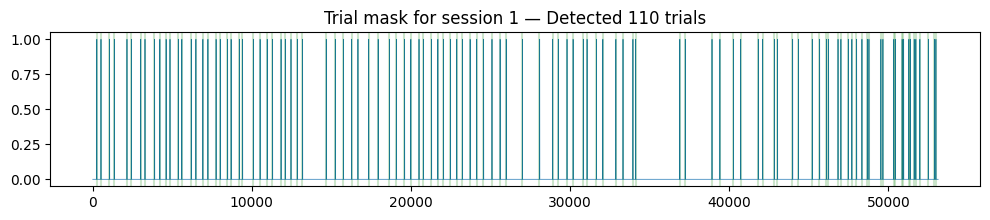

In [ ]:
plt.figure(figsize=(12, 2))
plt.plot(trial_mask.astype(int), lw=0.5)
plt.title(f"Trial mask for session {session_idx} — Detected {len(trial_starts)} trials")
for ts in trial_starts:
    plt.axvline(ts, color='g', alpha=0.2)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import pearsonr

# Parameters
fr = 29.8739
threshold = 0.2
n_bins = 50
place_cell_selectivity_factor = 1.5
peak_shift_thresh = 0.4
smoothing_sigma = 1

# Bin definitions
position_bins = np.linspace(0, 1, n_bins + 1)
bin_centers = (position_bins[:-1] + position_bins[1:]) / 2

# Storage for cross-session analysis
all_smoothed_maps = []
all_peak_locations = []
all_place_cell_flags = []
# PairedSessDays = [f'Day {i+1}' for i in range(len(AllSerialdffData))]  # fallback labels

# Step 1: Compute place fields per session
for session_idx in range(len(AllSerialdffData)):
    cSessData = AllSerialdffData[session_idx]
    dff_traces = cSessData[0]
    is_vr_on = cSessData[1]
    position = cSessData[3]

    valid_mask = is_vr_on > 0
    dff_traces_valid = dff_traces[:, valid_mask]
    position_valid = position[valid_mask]
    events = (dff_traces_valid > threshold).astype(int)

    n_neurons = dff_traces.shape[0]
    event_map = np.zeros((n_neurons, n_bins))
    occupancy = np.zeros(n_bins)
    for b in range(n_bins):
        bin_mask = (position_valid >= position_bins[b]) & (position_valid < position_bins[b + 1])
        occupancy[b] = np.sum(bin_mask) / fr
        for neuron_idx in range(n_neurons):
            n_events = np.sum(events[neuron_idx, bin_mask])
            event_map[neuron_idx, b] = n_events

    occupancy[occupancy == 0] = np.nan
    event_rate_map = event_map / occupancy[np.newaxis, :]
    normalized_map = event_rate_map / (np.nanmax(event_rate_map, axis=1, keepdims=True) + 1e-9)
    smoothed_map = gaussian_filter1d(normalized_map, sigma=smoothing_sigma, axis=1)
    peak_locations = np.nanargmax(smoothed_map, axis=1)
    peak_values = np.nanmax(smoothed_map, axis=1)
    median_values = np.nanmedian(smoothed_map, axis=1)
    is_place_cell = peak_values > 0.95*(place_cell_selectivity_factor * median_values)

    all_smoothed_maps.append(smoothed_map)
    all_peak_locations.append(peak_locations)
    all_place_cell_flags.append(is_place_cell)

# Step 2: Define reference and classify stability
ref_idx = 3
ref_pc_mask = all_place_cell_flags[ref_idx]
ref_sorted_indices = np.argsort(all_peak_locations[ref_idx][ref_pc_mask])
ref_place_cell_indices = np.where(ref_pc_mask)[0][ref_sorted_indices]

# Step 3: Visualization and Quantification
def plot_place_fields_as_curves(map_array, is_stable, is_unstable, bin_centers, title, height=0.8):
    n_cells = map_array.shape[0]
    plt.figure(figsize=(5, 12))
    for i in range(n_cells):
        y_base = i
        if is_stable[i]:
            color = 'red'
        elif is_unstable[i]:
            color = 'blue'
        else:
            continue
        curve = map_array[i]
        plt.fill_between(bin_centers, y_base, y_base + curve * height, color=color, linewidth=0)
    plt.ylim(0, n_cells)
    plt.xlim(0, 1)
    plt.xlabel("Run position (normalized)")
    plt.ylabel("Neuron (sorted)")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Step 4: Loop through sessions
# Step 4: Compute stability and correlations
stability_stats = []
correlations = []
ref_map = all_smoothed_maps[ref_idx][ref_place_cell_indices, :]
n_sessions = len(AllSerialdffData)
n_cells = len(ref_place_cell_indices)

# Initialize subplot figure
fig, axes = plt.subplots(1, n_sessions, figsize=(2 * n_sessions, 10), sharey=True)

for sess_idx in range(n_sessions):
    ax = axes[sess_idx]
    curr_map = all_smoothed_maps[sess_idx][ref_place_cell_indices, :]
    curr_peaks = all_peak_locations[sess_idx][ref_place_cell_indices]
    curr_mask = all_place_cell_flags[sess_idx][ref_place_cell_indices]
    ref_peaks = all_peak_locations[ref_idx][ref_place_cell_indices]

    peak_diff = np.abs(curr_peaks - ref_peaks) / n_bins
    is_stable = (peak_diff < peak_shift_thresh) & curr_mask
    is_unstable = (~is_stable) & curr_mask

    for i in range(n_cells):
        y_base = i
        if is_stable[i]:
            color = "#d30000"
        elif is_unstable[i]:
            color = 'lightgray'
        else:
            continue
        curve = curr_map[i]
        ax.fill_between(bin_centers, y_base, y_base + curve * 0.8, color=color, linewidth=0)

    # axis settings
    ax.set_xlim(0, 1)
    ax.set_ylim(0, n_cells)
    # ax.set_title(f"{PairedSessDays[sess_idx]}")
    ax.set_title(f"Day {PairedSessDays[sess_idx]}")
    ax.set_xlabel("Run position")
    if sess_idx == 0:
        ax.set_ylabel("Neuron (sorted by Day 1 peak)")

    # Quantify stability
    total = len(ref_place_cell_indices)
    n_stable = np.sum(is_stable)
    n_unstable = np.sum(is_unstable)
    stability_stats.append((n_stable / total, n_unstable / total))

    # Field similarity correlation
    session_corrs = [
        pearsonr(ref_map[i], curr_map[i])[0]
        if curr_mask[i] else np.nan
        for i in range(n_cells)
    ]
    correlations.append(session_corrs)

# Finalize figure
plt.suptitle("Place Field Stability Across Sessions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Stability summary bar plot
stable_frac, unstable_frac = zip(*stability_stats)
plt.figure(figsize=(3, 3))
plt.bar(range(len(stable_frac)), stable_frac, color="#d30000", label='Stable')
plt.bar(range(len(unstable_frac)), unstable_frac, bottom=stable_frac, color='lightgray', label='Unstable')
plt.xticks(range(len(PairedSessDays)), PairedSessDays, rotation=45)
plt.ylabel('% Place Cells')
plt.title('Stable vs Unstable PCs')
plt.legend()
plt.tight_layout()
plt.show()

# Field similarity plot
mean_corrs = [np.nanmean(c) for c in correlations]
plt.figure(figsize=(3, 3))
plt.plot(PairedSessDays, mean_corrs, marker='o',color='black')
plt.ylabel('Mean Field Correlation with Day 1')
plt.title('Cross-Session Place Field Similarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

**Quantify Stable Cells**


Rare PCs | Place cells in <30% of sessions

Intermittent PCs | PCs in 30–70% of sessions

Consistent PCs | PCs in ≥70% of sessions

Span-Stable | Place cells specifically in both Day 1 and Day 10, regardless of in-between

In [ ]:
def classify_stable_cells(
    place_cell_flags,
    peak_locations,
    threshold_peak_shift=0.2,
    n_bins=50
):
    """
    Categorize cells into 4 stability groups:
    1. Rare PCs
    2. Intermittent PCs
    3. Consistent PCs
    4. Span-Stable PCs (Day 1 & Day 10)

    Returns:
        group_dict: dictionary with group names and neuron indices
        pc_fraction: fraction of sessions each neuron is a PC
        peak_stability_matrix: [n_neurons x n_sessions] True if peak close to ref
    """
    n_sessions = len(place_cell_flags)
    n_neurons = len(place_cell_flags[0])
    pc_fraction = np.zeros(n_neurons)
    peak_stability_matrix = np.zeros((n_neurons, n_sessions), dtype=bool)

    # Compute PC fraction
    for i in range(n_neurons):
        pc_fraction[i] = np.mean([pc[i] for pc in place_cell_flags])

    # Compute peak stability w.r.t. Day 1
    ref_peaks = peak_locations[0]
    for sess_idx in range(n_sessions):
        shift = np.abs(peak_locations[sess_idx] - ref_peaks) / n_bins
        both_pc = np.logical_and(place_cell_flags[0], place_cell_flags[sess_idx])
        peak_stability_matrix[:, sess_idx] = np.logical_and(both_pc, shift < threshold_peak_shift)

    # Grouping
    group_dict = {
        'Rare PCs': np.where(pc_fraction < 0.3)[0],
        'Intermittent PCs': np.where((pc_fraction >= 0.3) & (pc_fraction < 0.7))[0],
        'Consistent PCs': np.where(pc_fraction >= 0.7)[0],
        'Span-Stable PCs': np.where(np.logical_and(place_cell_flags[0], place_cell_flags[-1]))[0]
    }

    return group_dict, pc_fraction, peak_stability_matrix



def plot_stability_spectrum(pc_frac, group_dict):
    plt.figure(figsize=(6, 6))
    colors = {'Rare PCs': 'gray', 'Intermittent PCs': 'orange', 'Consistent PCs': 'green', 'Span-Stable PCs': 'blue'}
    labels_done = set()

    for group, indices in group_dict.items():
        color = colors[group]
        label = group if group not in labels_done else None
        plt.scatter(indices, pc_frac[indices], c=color, label=label, alpha=0.7)
        labels_done.add(group)

    plt.axhline(0.3, color='black', linestyle='--')
    plt.axhline(0.7, color='black', linestyle='--')
    plt.xlabel('Neuron Index')
    plt.ylabel('PC Fraction Across Sessions')
    plt.title('Place Cell Stability Spectrum')
    plt.legend()
    plt.tight_layout()
    plt.show()



# Bar plot: percentage of each group
def plot_pc_group_distribution(group_dict, total_neurons):
    group_names = ['Rare PCs', 'Intermittent PCs', 'Consistent PCs', 'Span-Stable PCs']
    counts = [len(group_dict[group]) for group in group_names]
    percentages = [100 * c / total_neurons for c in counts]

    plt.figure(figsize=(6, 4))
    bars = plt.bar(group_names, percentages, color=['gray', 'orange', 'green', 'blue'])
    plt.ylabel('% of Neurons')
    plt.title('Distribution of Neurons by Place Cell Stability Type')
    plt.ylim(0, 100)
    for bar, perc in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{perc:.1f}%', ha='center')
    plt.tight_layout()
    plt.show()

# Distribution of sustained place cells (how many sessions each neuron was a place cell)
def plot_sustained_pc_distribution(place_cell_flags):
    n_neurons = len(place_cell_flags[0])
    pc_counts = np.zeros(n_neurons)
    for i in range(n_neurons):
        pc_counts[i] = np.sum([pc[i] for pc in place_cell_flags])

    plt.figure(figsize=(6, 4))
    plt.hist(pc_counts, bins=range(0, len(place_cell_flags) + 2), color='purple', alpha=0.7, edgecolor='black')
    plt.xlabel('Number of Sessions as Place Cell')
    plt.ylabel('Number of Neurons')
    plt.title('Distribution of Place Cell Lifespan Across Sessions')
    plt.xticks(range(len(place_cell_flags) + 1))
    plt.tight_layout()
    plt.show()



Rare PCs: 182 neurons
Intermittent PCs: 77 neurons
Consistent PCs: 46 neurons
Span-Stable PCs: 52 neurons


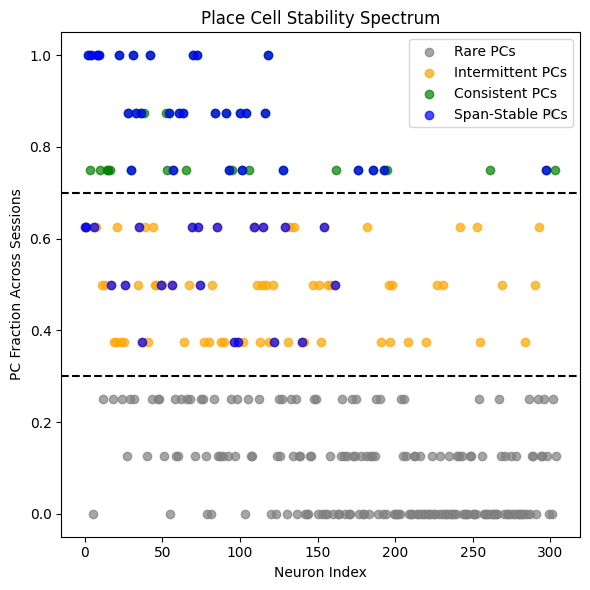

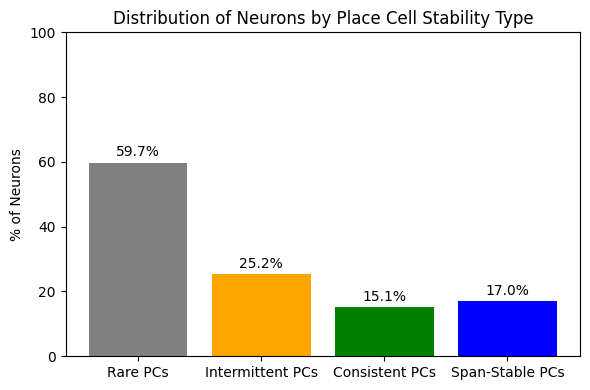

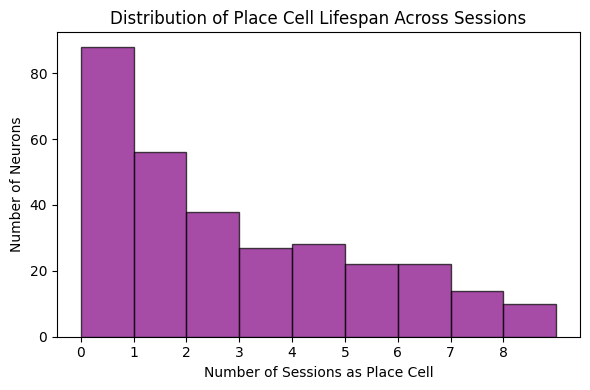

In [ ]:
group_dict, pc_frac, peak_stability_matrix = classify_stable_cells(
    all_place_cell_flags,
    all_peak_locations,
    threshold_peak_shift=0.2,
    n_bins=n_bins
)

for group, idxs in group_dict.items():
    print(f"{group}: {len(idxs)} neurons")

plot_stability_spectrum(pc_frac, group_dict)



# Apply using previously computed group_dict and place_cell_flags
total_neurons = len(all_place_cell_flags[0])
plot_pc_group_distribution(group_dict, total_neurons)
plot_sustained_pc_distribution(all_place_cell_flags)



Magee style figures

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import pearsonr
from scipy.optimize import curve_fit

# Dummy placeholders for inputs
# Replace these with actual variables in your environment:
# all_place_cell_flags, all_peak_locations, all_smoothed_maps, PairedSessDays

# Simulation-friendly example for plot_panel_b and plot_panel_c
def compute_pc_summary(all_place_cell_flags):
    n_sessions = len(all_place_cell_flags)
    n_neurons = len(all_place_cell_flags[0])
    pc_matrix = np.array(all_place_cell_flags).astype(int)  # [sessions x neurons]
    pc_matrix = pc_matrix.T  # [neurons x sessions]

    total_pc_days = np.sum(pc_matrix, axis=1)
    return total_pc_days, pc_matrix

# Panel (b): Histogram of # of days each cell was a PC
def plot_panel_b(pc_days, ax):
    bins = np.arange(0, 8) - 0.5
    ax.hist(pc_days, bins=bins, color='black', alpha=0.7, label='PCs Data', density=True)
    
    # Simulated random PC probability (uniform chance)
    n = len(pc_days)
    p = np.mean(pc_days) / 7
    from scipy.stats import binom
    x = np.arange(0, 8)
    y = binom.pmf(x, 7, p)
    ax.plot(x, y, 'o--', color='gray', label='Uniform PC prob')

    ax.set_xticks(np.arange(0, 8))
    ax.set_xlabel("Total days w/ PF")
    ax.set_ylabel("Proportion of neurons")
    ax.legend()
    ax.set_title("b")

# Panel (c): PC formation probability vs. previous active days
def plot_panel_c(pc_matrix, ax):
    n_neurons, n_sessions = pc_matrix.shape
    transitions = []
    for i in range(1, n_sessions):
        prev_days = np.sum(pc_matrix[:, :i], axis=1)
        became_pc = pc_matrix[:, i]
        for d in range(0, i+1):
            mask = prev_days == d
            if np.sum(mask) > 0:
                prob = np.mean(became_pc[mask])
                transitions.append((d, prob))
    
    bins = sorted(set(x[0] for x in transitions))
    means = [np.mean([x[1] for x in transitions if x[0] == b]) for b in bins]
    ax.bar(bins, means, color='gray', edgecolor='black')
    ax.set_xlabel("# previous days w/ PF")
    ax.set_ylabel("Probability of PF Formation")
    ax.set_title("c")

# Panel (d): PF peak shift histogram
def plot_panel_d(all_peak_locations, all_place_cell_flags, n_bins, ax):
    ref_peaks = all_peak_locations[0]
    shifts = []
    for sess_idx in range(1, len(all_peak_locations)):
        curr_peaks = all_peak_locations[sess_idx]
        for i in range(len(ref_peaks)):
            if all_place_cell_flags[0][i] and all_place_cell_flags[sess_idx][i]:
                shift = (curr_peaks[i] - ref_peaks[i]) * (180 / n_bins)
                shifts.append(shift)

    ax.hist(shifts, bins=60, density=True, color='gray')
    ax.axhline(1/180, linestyle='--', color='black', label='Random Shift')
    ax.set_xlim(-90, 90)
    ax.set_xlabel("Distance from previous PF loc (cm)")
    ax.set_ylabel("Probability Density")
    ax.set_title("d")
    ax.legend()

# Plot combined panels b–d as an example
def plot_fig2_partial(all_place_cell_flags, all_peak_locations, all_smoothed_maps, n_bins=50):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Compute data
    pc_days, pc_matrix = compute_pc_summary(all_place_cell_flags)

    # Plot panels
    plot_panel_b(pc_days, axes[0])
    plot_panel_c(pc_matrix, axes[1])
    plot_panel_d(all_peak_locations, all_place_cell_flags, n_bins, axes[2])

    plt.tight_layout()
    plt.show()

# Example call — REQUIRES your session data to be loaded
# plot_fig2_partial(all_place_cell_flags, all_peak_locations, all_smoothed_maps)



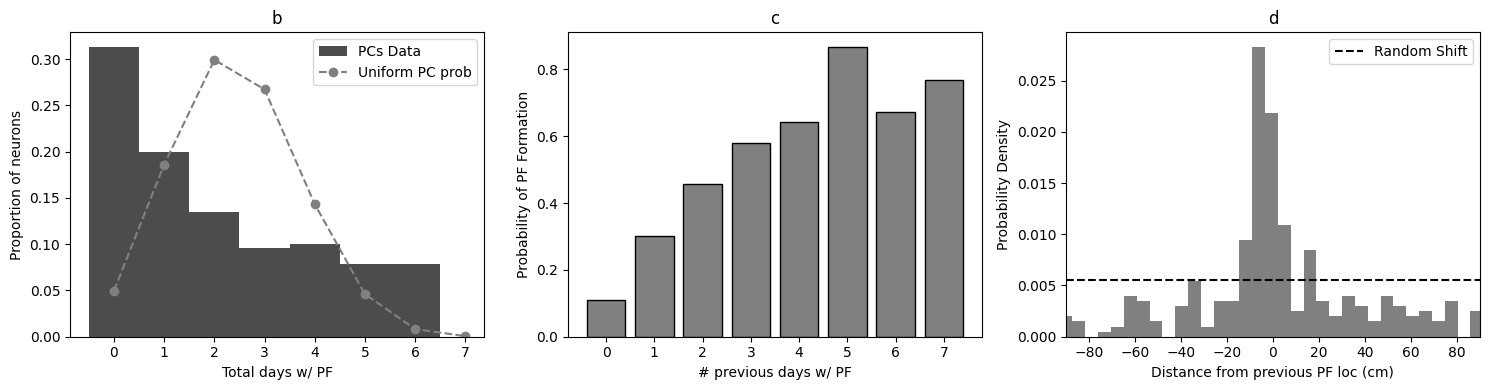

In [ ]:
plot_fig2_partial(all_place_cell_flags, all_peak_locations, all_smoothed_maps, n_bins=50)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

def double_exp(x, A, tau1, B, tau2):
    return A * np.exp(-x / tau1) + B * np.exp(-x / tau2)

def plot_fig2_full(all_place_cell_flags, all_peak_locations, all_smoothed_maps, n_bins=50):
    n_sessions = len(all_place_cell_flags)
    n_neurons = len(all_place_cell_flags[0])
    pc_matrix = np.array(all_place_cell_flags).astype(int).T  # [neurons x sessions]
    ref_peaks = all_peak_locations[0]

    fig = plt.figure(figsize=(20, 20))
    axs = fig.subplots(4, 3)

    # Panel a: Example cells (mocked heatmaps for illustration)
    ax = axs[0, 0]
    ax.imshow(np.random.rand(30, n_sessions), aspect='auto', cmap='viridis')
    ax.set_title('a')
    ax.set_ylabel('Example PCs')
    ax.set_xlabel('Days')

    # Panel b
    pc_days = np.sum(pc_matrix, axis=1)
    ax = axs[0, 1]
    bins = np.arange(0, 8) - 0.5
    ax.hist(pc_days, bins=bins, color='black', alpha=0.7, label='PCs Data', density=True)
    from scipy.stats import binom
    p = np.mean(pc_days) / 7
    x = np.arange(0, 8)
    y = binom.pmf(x, 7, p)
    ax.plot(x, y, 'o--', color='gray', label='Uniform PC prob')
    ax.set_title('b')
    ax.set_xticks(np.arange(0, 8))
    ax.set_xlabel("Total days w/ PF")
    ax.set_ylabel("Proportion")
    ax.legend()

    # Panel c
    ax = axs[0, 2]
    transitions = []
    for i in range(1, n_sessions):
        prev_days = np.sum(pc_matrix[:, :i], axis=1)
        became_pc = pc_matrix[:, i]
        for d in range(0, i+1):
            mask = prev_days == d
            if np.sum(mask) > 0:
                prob = np.mean(became_pc[mask])
                transitions.append((d, prob))
    bins = sorted(set(x[0] for x in transitions))
    means = [np.mean([x[1] for x in transitions if x[0] == b]) for b in bins]
    ax.bar(bins, means, color='gray', edgecolor='black')
    ax.set_title('c')
    ax.set_xlabel("# previous days w/ PF")
    ax.set_ylabel("Prob. of PF Formation")

    # Panel d
    ax = axs[1, 0]
    shifts = []
    for sess_idx in range(1, n_sessions):
        curr_peaks = all_peak_locations[sess_idx]
        for i in range(n_neurons):
            if all_place_cell_flags[0][i] and all_place_cell_flags[sess_idx][i]:
                shift = (curr_peaks[i] - ref_peaks[i]) * (180 / n_bins)
                shifts.append(shift)
    ax.hist(shifts, bins=60, density=True, color='gray')
    ax.axhline(1/180, linestyle='--', color='black', label='Random Shift')
    ax.set_xlim(-90, 90)
    ax.set_title('d')
    ax.set_xlabel("Distance from previous PF (cm)")
    ax.set_ylabel("Density")
    ax.legend()

    # Panel e
    ax = axs[1, 1]
    first_active_day = np.argmax(pc_matrix, axis=1)
    consistent_counts = np.zeros(n_sessions)
    for i in range(n_neurons):
        fad = first_active_day[i]
        if np.all(pc_matrix[i, fad:] == 1):
            consistent_counts[fad] += 1
    xdata = np.arange(1, n_sessions + 1)
    ydata = consistent_counts[0:n_sessions]
    ax.plot(xdata, ydata, 'ro-', label='PCs from day 1')
    popt, _ = curve_fit(lambda x, a, b: a * np.exp(-x / b), xdata, ydata, p0=(ydata[0], 1))
    ax.plot(xdata, double_exp(xdata, popt[0], popt[1], 0, 1), 'r--', label='Double exp fit')
    ax.set_title('e')
    ax.set_xlabel("Day of first PF")
    ax.set_ylabel("Count of consistent PCs")
    ax.legend()

    # Panel f
    ax = axs[1, 2]
    day1_map = all_smoothed_maps[0][pc_matrix[:, 0] == 1]
    sort_idx = np.argsort(np.argmax(day1_map, axis=1))
    ax.imshow(day1_map[sort_idx], aspect='auto', cmap='jet')
    ax.set_title("f (Day 1 PCs)")

    # Panel g
    ax = axs[2, 0]
    total_pcs = np.sum(pc_matrix, axis=0)
    past_pcs = np.zeros_like(total_pcs)
    new_pcs = np.zeros_like(total_pcs)
    for s in range(n_sessions):
        if s == 0:
            new_pcs[s] = total_pcs[s]
        else:
            new_flags = np.logical_and(pc_matrix[:, s], ~np.any(pc_matrix[:, :s], axis=1))
            past_flags = np.logical_and(pc_matrix[:, s], np.any(pc_matrix[:, :s], axis=1))
            new_pcs[s] = np.sum(new_flags)
            past_pcs[s] = np.sum(past_flags)
    ax.plot(range(n_sessions), total_pcs, 'ko-', label='total')
    ax.plot(range(n_sessions), past_pcs, 'ro-', label='past')
    ax.plot(range(n_sessions), new_pcs, 'bo-', label='new')
    ax.set_title('g')
    ax.legend()

    # Panel h
    ax = axs[2, 1]
    ratio = past_pcs[1:] / (new_pcs[1:] + 1e-9)
    ax.plot(range(1, n_sessions), ratio, 'ko-', label='Observed')
    ax.plot(range(1, n_sessions), [1.0]*len(ratio), 'k--', label='Random')
    ax.set_title('h')
    ax.set_ylabel('past/new ratio')
    ax.legend()

    # Panel i
    ax = axs[2, 2]
    sustained_flags = np.all(pc_matrix == 1, axis=1)
    transient_flags = np.any(pc_matrix, axis=1) & ~sustained_flags
    sustained_map = np.vstack([all_smoothed_maps[s][:, :] for s in range(n_sessions)])[
        sustained_flags.repeat(n_sessions), :
    ]
    ax.imshow(sustained_map, aspect='auto', cmap='hot')
    ax.set_title("i (sustained PCs)")

    # Panel j
    ax = axs[3, 0]
    sustained_counts = np.sum(pc_matrix == 1, axis=0)
    ax.plot(range(n_sessions), total_pcs, 'ko-', label='Total PCs')
    ax.plot(range(n_sessions), sustained_counts, 'ro-', label='Sustained PCs')
    ax.fill_between(range(n_sessions), sustained_counts, total_pcs, color='skyblue', alpha=0.4)
    ax.fill_between(range(n_sessions), 0, sustained_counts, color='lightcoral', alpha=0.6)
    ax.set_title('j')
    ax.legend()

    # Panel k
    ax = axs[3, 1]
    frac_sustained = sustained_counts / total_pcs
    ax.plot(range(n_sessions), frac_sustained, 'ko-')
    ax.set_title('k')
    ax.set_ylabel('Sustained / Total PCs')

    fig.delaxes(axs[3, 2])
    fig.suptitle("Figure 2 Replication – Stable Place Field Dynamics", fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



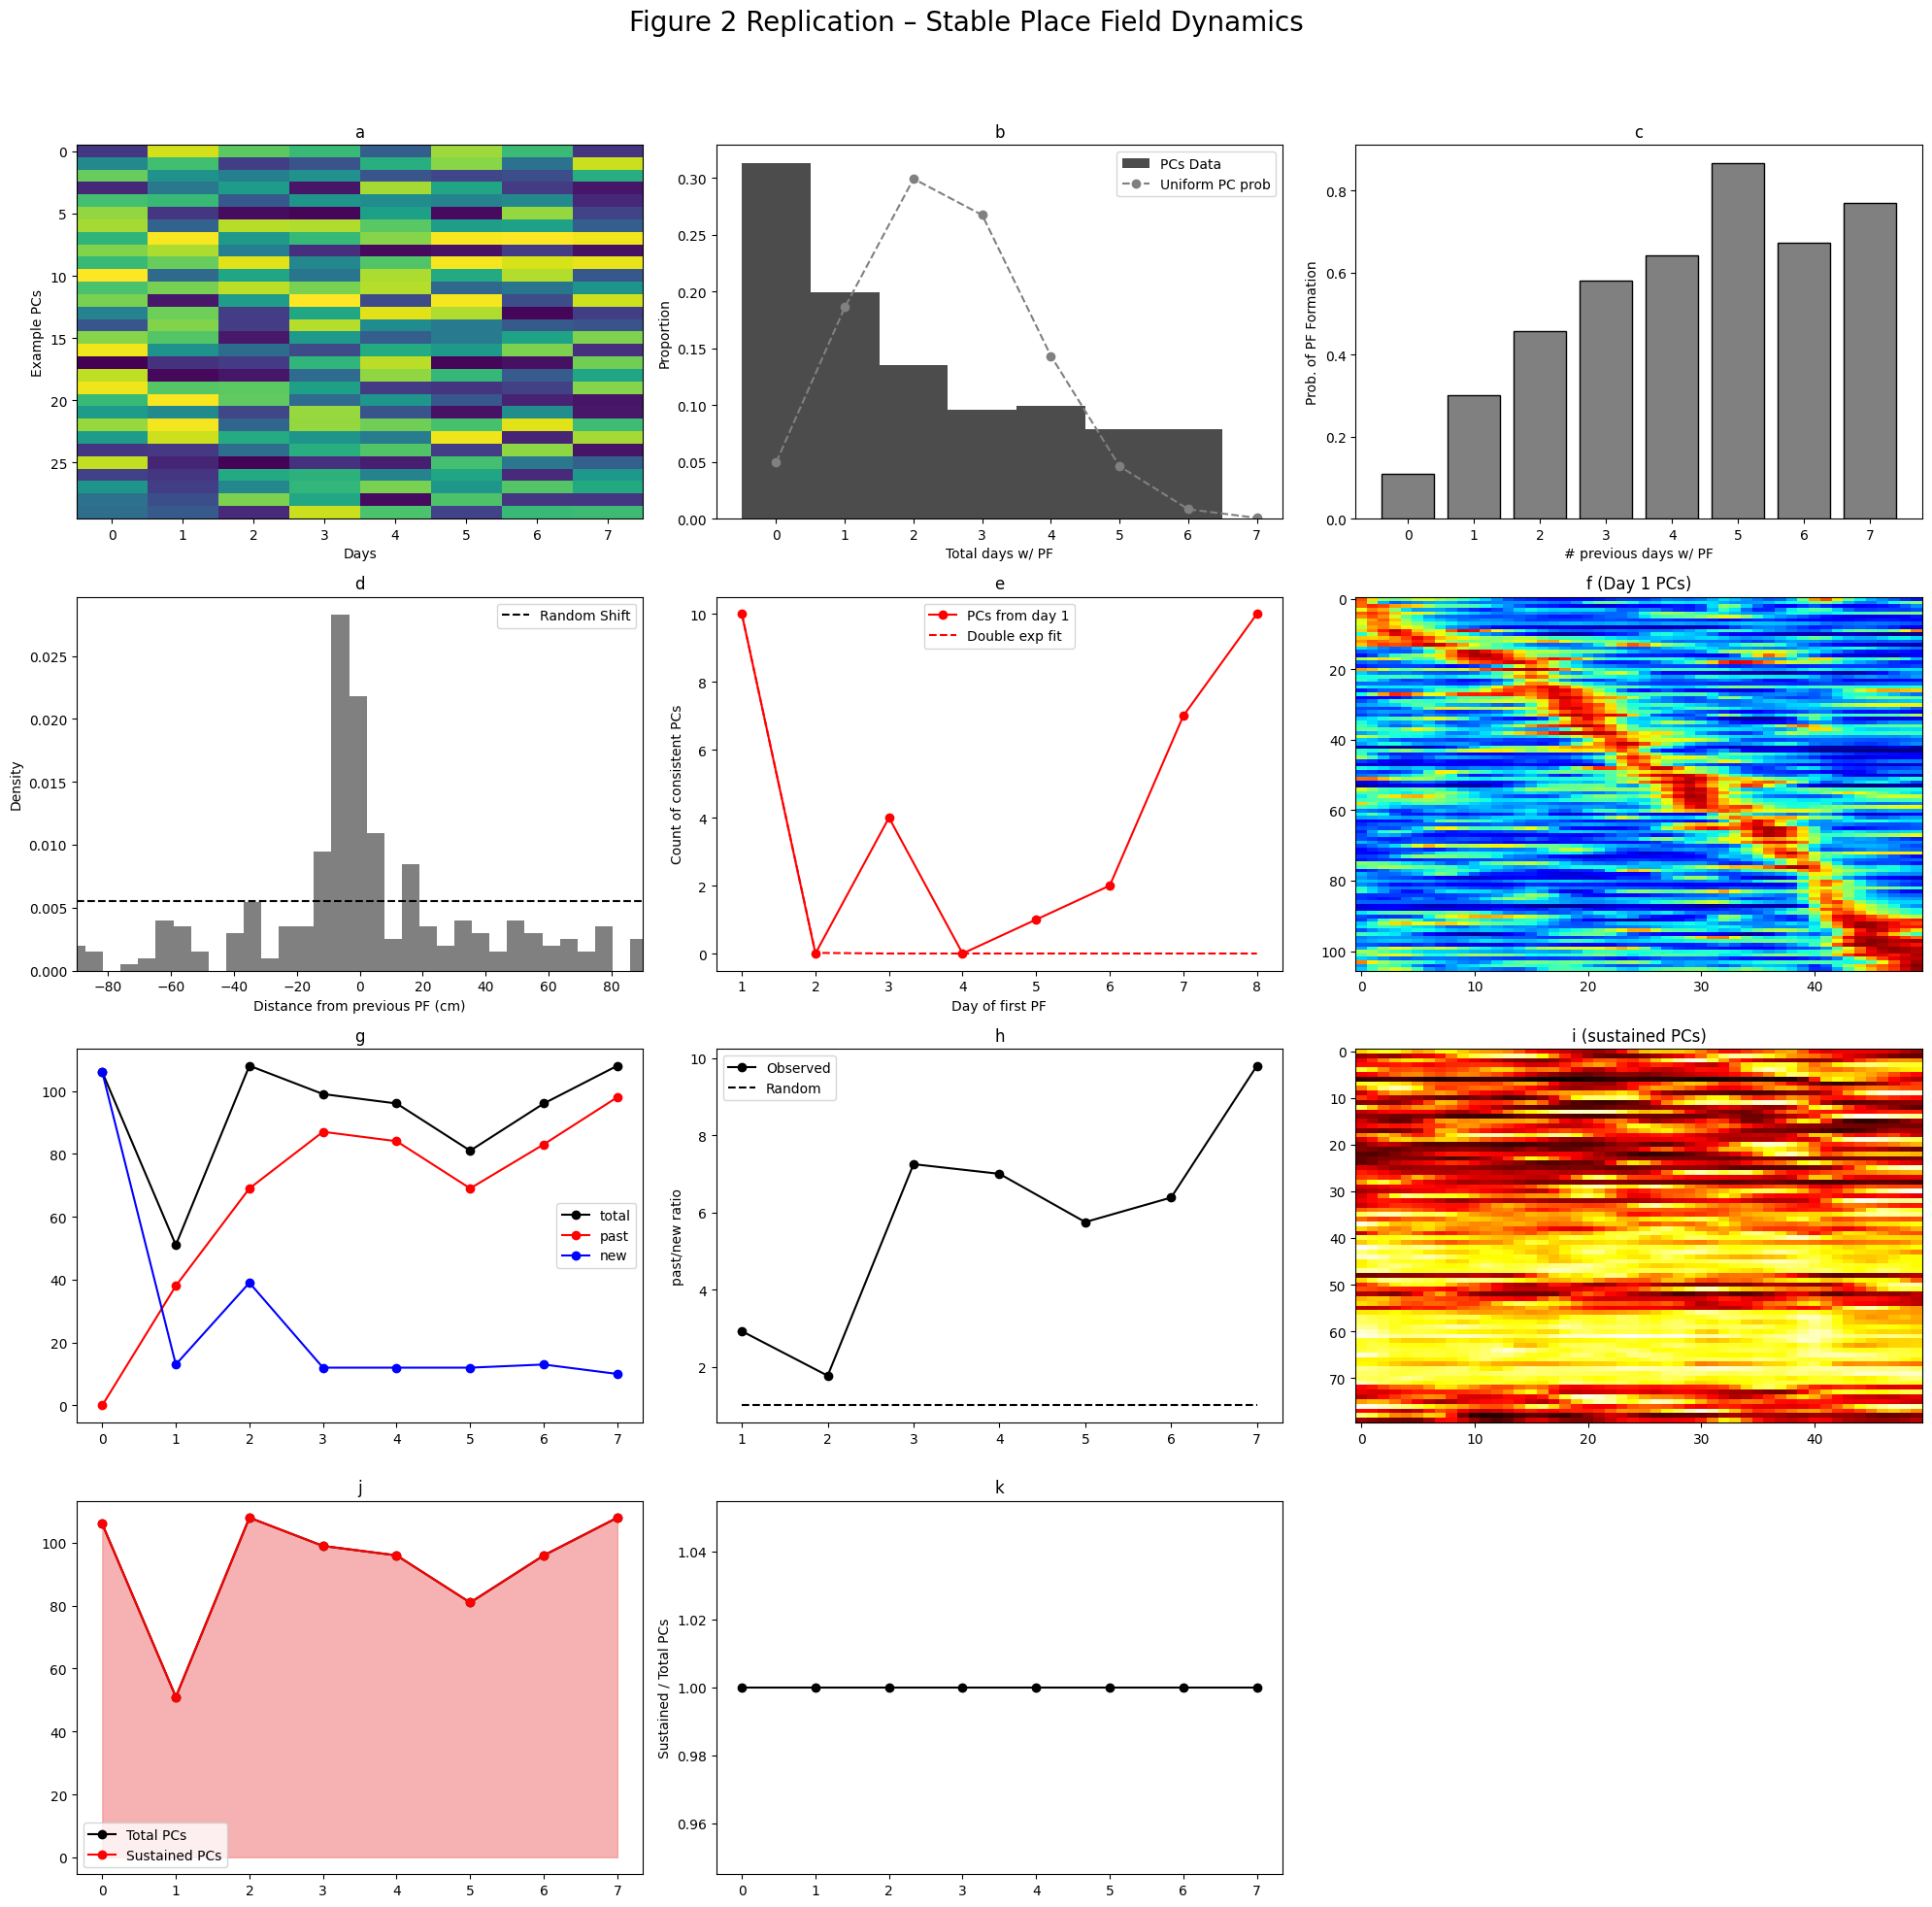

In [ ]:
plot_fig2_full(all_place_cell_flags, all_peak_locations, all_smoothed_maps, n_bins=50)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


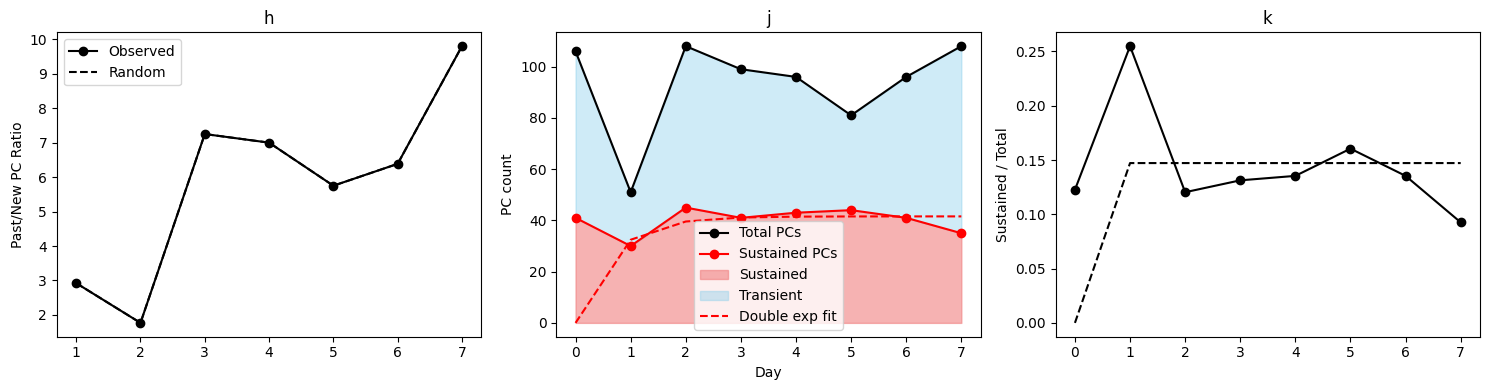

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Utility: double exponential function
def double_exp(x, A, tau1, B, tau2):
    return A * np.exp(-x / tau1) + B * np.exp(-x / tau2)

# Corrected Panel h: Ratio of past to new PCs vs. random baseline
def plot_panel_h_corrected(pc_matrix, ax):
    n_sessions = pc_matrix.shape[1]
    past_pcs = np.zeros(n_sessions)
    new_pcs = np.zeros(n_sessions)
    
    for s in range(n_sessions):
        if s == 0:
            new_pcs[s] = np.sum(pc_matrix[:, s])
        else:
            past_flags = np.any(pc_matrix[:, :s], axis=1)
            new_flags = ~past_flags
            past_pcs[s] = np.sum(np.logical_and(past_flags, pc_matrix[:, s]))
            new_pcs[s] = np.sum(np.logical_and(new_flags, pc_matrix[:, s]))

    ratio = past_pcs[1:] / (new_pcs[1:] + 1e-9)

    # Simulate random: shuffle past/new across neurons
    random_ratios = []
    for _ in range(1000):
        shuffled = np.random.permutation(pc_matrix)
        rp = np.zeros(n_sessions)
        rn = np.zeros(n_sessions)
        for s in range(1, n_sessions):
            pf = np.any(shuffled[:, :s], axis=1)
            nf = ~pf
            rp[s] = np.sum(np.logical_and(pf, shuffled[:, s]))
            rn[s] = np.sum(np.logical_and(nf, shuffled[:, s]))
        random_ratios.append(rp[1:] / (rn[1:] + 1e-9))
    random_mean = np.nanmean(random_ratios, axis=0)

    ax.plot(range(1, n_sessions), ratio, 'ko-', label='Observed')
    ax.plot(range(1, n_sessions), random_mean, 'k--', label='Random')
    ax.set_title("h")
    ax.set_ylabel("Past/New PC Ratio")
    ax.legend()

# Corrected Panel j: Sustained vs transient PCs with model fit
def plot_panel_j_corrected(pc_matrix, ax):
    n_sessions = pc_matrix.shape[1]
    total_pcs = np.sum(pc_matrix, axis=0)
    
    # Sustained: must be active on day 1 and all subsequent days
    sustained_mask = np.all(pc_matrix[:, 0:7] == 1, axis=1)  # full consistency across 7 days
    sustained_mask = np.sum(pc_matrix[:, 0:7], axis=1) >= 5  # active in ≥5 of first 6 sessions
    sustained_pcs = np.sum(pc_matrix[sustained_mask, :], axis=0)

    ax.plot(range(n_sessions), total_pcs, 'ko-', label='Total PCs')
    ax.plot(range(n_sessions), sustained_pcs, 'ro-', label='Sustained PCs')
    ax.fill_between(range(n_sessions), 0, sustained_pcs, color='lightcoral', alpha=0.6, label='Sustained')
    ax.fill_between(range(n_sessions), sustained_pcs, total_pcs, color='skyblue', alpha=0.4, label='Transient')

    # Fit double exponential to sustained
    x = np.arange(n_sessions)
    y = sustained_pcs
    try:
        popt, _ = curve_fit(lambda x, a, b: a * (1 - np.exp(-x / b)), x, y, p0=(y[-1], 2))
        fit_y = popt[0] * (1 - np.exp(-x / popt[1]))
        ax.plot(x, fit_y, 'r--', label='Double exp fit')
    except:
        pass

    ax.set_title("j")
    ax.set_xlabel("Day")
    ax.set_ylabel("PC count")
    ax.legend()

# Corrected Panel k: Sustained fraction of total PCs
def plot_panel_k_corrected(pc_matrix, ax):
    n_sessions = pc_matrix.shape[1]
    total_pcs = np.sum(pc_matrix, axis=0)
    sustained_mask = np.all(pc_matrix[:, 0:7] == 1, axis=1)
    sustained_pcs = np.sum(pc_matrix[sustained_mask, :], axis=0)
    frac_sustained = sustained_pcs / (total_pcs + 1e-9)

    ax.plot(range(n_sessions), frac_sustained, 'ko-')
    try:
        popt, _ = curve_fit(lambda x, a, b: a * (1 - np.exp(-x / b)), np.arange(n_sessions), frac_sustained)
        fit_y = popt[0] * (1 - np.exp(-np.arange(n_sessions) / popt[1]))
        ax.plot(range(n_sessions), fit_y, 'k--')
    except:
        pass
    ax.set_title("k")
    ax.set_ylabel("Sustained / Total")

# Example call (must define pc_matrix first)
pc_matrix = np.array(all_place_cell_flags).astype(int).T  # [neurons x sessions]
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
plot_panel_h_corrected(pc_matrix, axs[0])
plot_panel_j_corrected(pc_matrix, axs[1])
plot_panel_k_corrected(pc_matrix, axs[2])
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


def compare_sustained_vs_others(all_place_cell_flags, all_smoothed_maps, n_bins=50):
    # Compute place cell matrix and identify sustained vs transient
    n_sessions = len(all_place_cell_flags)
    n_neurons = len(all_place_cell_flags[0])
    pc_matrix = np.array(all_place_cell_flags).astype(int).T  # [neurons x sessions]

    
    sustained_mask = np.sum(pc_matrix[:, 0:7], axis=1) >= 5  # active in ≥5 of first 6 sessions

    transient_mask = np.any(pc_matrix, axis=1) & ~sustained_mask

    # Average smoothed map across sessions
    avg_maps = np.mean(np.array(all_smoothed_maps), axis=0)  # [neurons x bins]

    # Compute firing rate (mean of the place field)
    firing_rates_sust = np.nanmean(avg_maps[sustained_mask], axis=1)
    firing_rates_trans = np.nanmean(avg_maps[transient_mask], axis=1)

    # Compute PF width (number of bins above 50% max)
    width_sust = np.sum(avg_maps[sustained_mask] > (np.max(avg_maps[sustained_mask], axis=1, keepdims=True) * 0.5), axis=1)
    width_trans = np.sum(avg_maps[transient_mask] > (np.max(avg_maps[transient_mask], axis=1, keepdims=True) * 0.5), axis=1)

    # Optional: Peak amplitude
    peak_sust = np.max(avg_maps[sustained_mask], axis=1)
    peak_trans = np.max(avg_maps[transient_mask], axis=1)

    # Plotting
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))

    axs[0].hist(firing_rates_sust, bins=20, alpha=0.6, label='Sustained', color='red')
    axs[0].hist(firing_rates_trans, bins=20, alpha=0.6, label='Other', color='gray')
    axs[0].set_title("Mean Firing Rate")
    axs[0].legend()

    axs[1].hist(width_sust, bins=20, alpha=0.6, label='Sustained', color='red')
    axs[1].hist(width_trans, bins=20, alpha=0.6, label='Other', color='gray')
    axs[1].set_title("Place Field Width")

    axs[2].hist(peak_sust, bins=20, alpha=0.6, label='Sustained', color='red')
    axs[2].hist(peak_trans, bins=20, alpha=0.6, label='Other', color='gray')
    axs[2].set_title("Peak Amplitude")

    plt.suptitle("Comparison of Sustained vs Other Place Cells")
    plt.tight_layout()
    plt.show()

    # Stats
    t1, p1 = ttest_ind(firing_rates_sust, firing_rates_trans, equal_var=False)
    t2, p2 = ttest_ind(width_sust, width_trans, equal_var=False)
    t3, p3 = ttest_ind(peak_sust, peak_trans, equal_var=False)

    print(f"Firing Rate t={t1:.2f}, p={p1:.3e}")
    print(f"PF Width t={t2:.2f}, p={p2:.3e}")
    print(f"Peak Amplitude t={t3:.2f}, p={p3:.3e}")



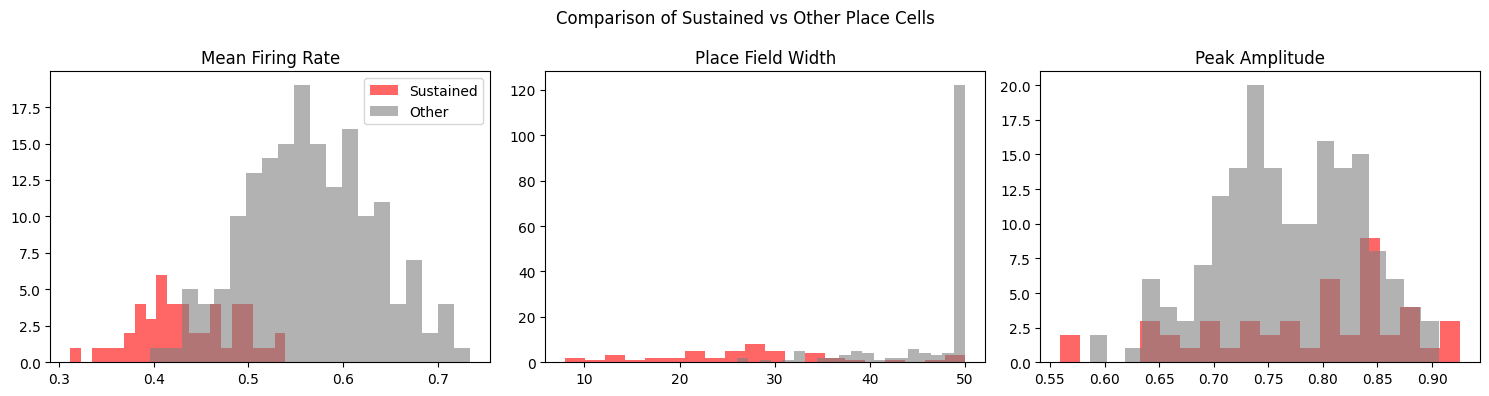

Firing Rate t=-14.41, p=1.584e-25
PF Width t=-13.23, p=9.737e-19
Peak Amplitude t=1.22, p=2.287e-01


In [ ]:
compare_sustained_vs_others(all_place_cell_flags, all_smoothed_maps, n_bins=50)


In [ ]:
# Re-import libraries and redefine the function after code execution state reset

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import ttest_ind

def compare_sustained_vs_others_violin_box(all_place_cell_flags, all_smoothed_maps, n_bins=50):
    pc_matrix = np.array(all_place_cell_flags).astype(int).T
    sustained_mask = np.sum(pc_matrix[:, 0:7], axis=1) >= 5
    transient_mask = np.any(pc_matrix, axis=1) & ~sustained_mask
    avg_maps = np.mean(np.array(all_smoothed_maps), axis=0)

    def extract_features(mask, label):
        return pd.DataFrame({
            "Firing Rate": np.nanmean(avg_maps[mask], axis=1),
            "Width": np.sum(avg_maps[mask] > (np.max(avg_maps[mask], axis=1, keepdims=True) * 0.5), axis=1),
            "Peak": np.max(avg_maps[mask], axis=1),
            "Group": label
        })

    df_sust = extract_features(sustained_mask, "Sustained")
    df_trans = extract_features(transient_mask, "Other")
    df_all = pd.concat([df_sust, df_trans], ignore_index=True)

    fig, axs = plt.subplots(3, 2, figsize=(4, 10))
    features = ["Firing Rate", "Width", "Peak"]
    for i, feature in enumerate(features):
        sns.boxplot(x="Group", y=feature, data=df_all, ax=axs[i, 0], palette=["red", "gray"])
        axs[i, 0].set_title(f"{feature} (Boxplot)")

        sns.violinplot(x="Group", y=feature, data=df_all, ax=axs[i, 1], palette=["red", "gray"])
        axs[i, 1].set_title(f"{feature} (Violin)")

    plt.suptitle("Sustained vs Other Place Cells: Feature Comparison")
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

    for feature in features:
        vals_sust = df_sust[feature].values
        vals_trans = df_trans[feature].values
        t, p = ttest_ind(vals_sust, vals_trans, equal_var=False)
        print(f"{feature} t={t:.2f}, p={p:.3e}")


/var/folders/zl/dq7c13p16bsb4qhmx8fvgp2m0000gn/T/ipykernel_27997/1989499317.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Group", y=feature, data=df_all, ax=axs[i, 0], palette=["red", "gray"])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Pytho

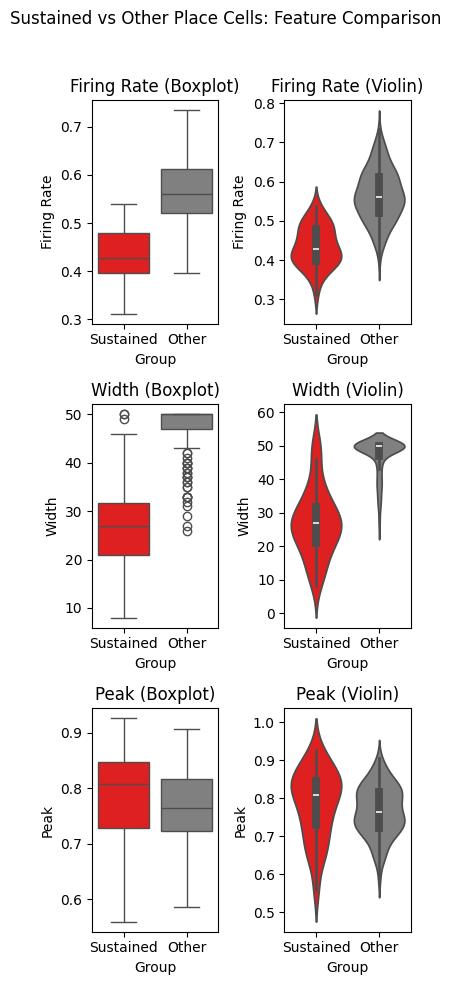

Firing Rate t=-14.41, p=1.584e-25
Width t=-13.23, p=9.737e-19
Peak t=1.22, p=2.287e-01


In [ ]:
compare_sustained_vs_others_violin_box(all_place_cell_flags, all_smoothed_maps, n_bins=50)


Predicting stable cells

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def plot_population_manifold_over_sessions(all_smoothed_maps, PairedSessDays):
    n_sessions = len(all_smoothed_maps)
    fig = plt.figure(figsize=(18, 12))
    
    for sess_idx in range(n_sessions):
        smoothed_map = all_smoothed_maps[sess_idx]  # [neurons x bins]
        # Transpose to [bins x neurons]
        X = smoothed_map.T
        X = np.nan_to_num(X)  # replace NaNs with 0

        pca = PCA(n_components=3)
        X_pca = pca.fit_transform(X)  # [bins x 3]

        ax = fig.add_subplot(2, (n_sessions + 1) // 2, sess_idx + 1, projection='3d')
        ax.plot(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], linewidth=2)
        ax.set_title(f"Day {PairedSessDays[sess_idx]}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

    fig.suptitle("Neural Manifold Across Sessions (First 3 PCs)", fontsize=18)
    plt.tight_layout()
    plt.show()


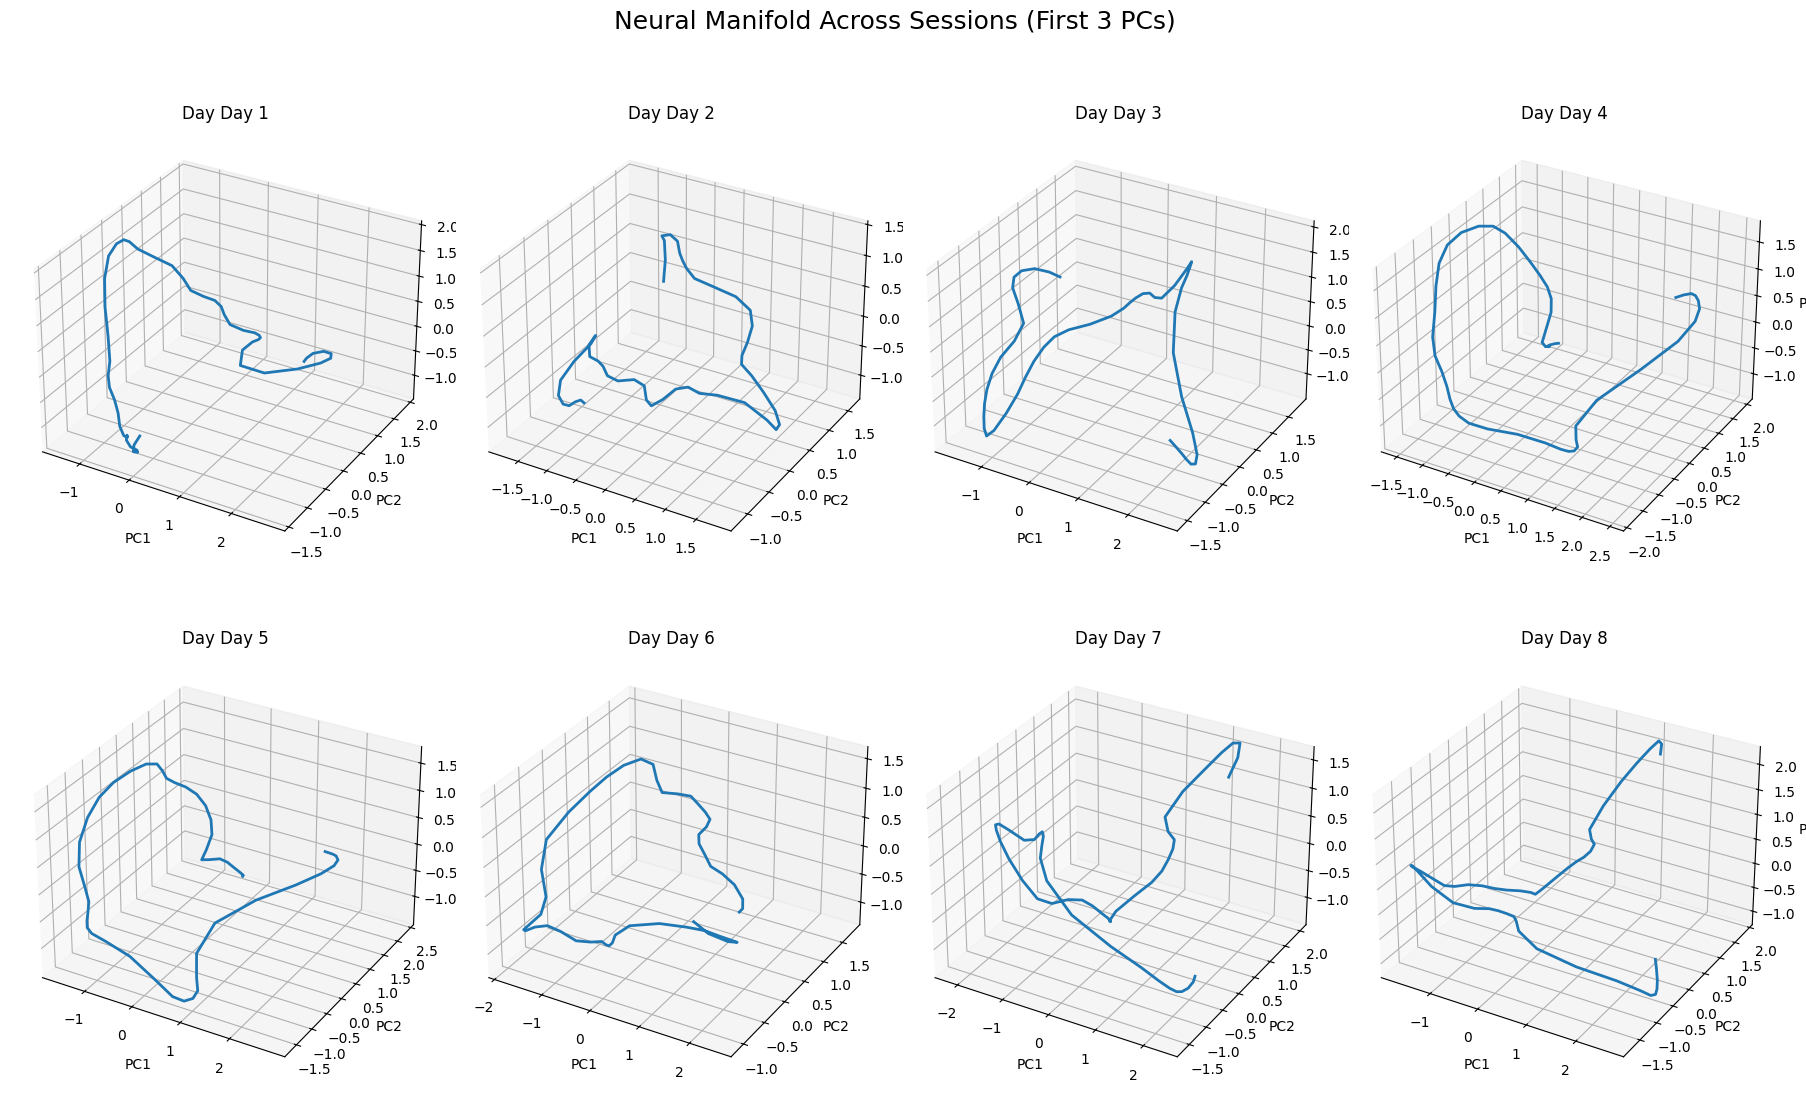

In [ ]:
plot_population_manifold_over_sessions(all_smoothed_maps, PairedSessDays)


same subspace

In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

def plot_fixed_basis_manifold(all_smoothed_maps, PairedSessDays):
    n_sessions = len(all_smoothed_maps)

    # Step 1: Get basis from session 1 (transposed to [bins x neurons])
    X_ref = np.nan_to_num(all_smoothed_maps[0].T)  # [bins x neurons]
    pca_ref = PCA(n_components=3)
    pca_ref.fit(X_ref)  # defines the fixed basis

    # Step 2: Project each session into session 1's PCA basis
    fig = plt.figure(figsize=(18, 12))
    
    for sess_idx in range(n_sessions):
        X = np.nan_to_num(all_smoothed_maps[sess_idx].T)  # [bins x neurons]
        X_proj = pca_ref.transform(X)  # project using session 1 basis

        ax = fig.add_subplot(2, (n_sessions + 1) // 2, sess_idx + 1, projection='3d')
        ax.plot(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2], linewidth=2)
        ax.set_title(f"Day {PairedSessDays[sess_idx]}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

    fig.suptitle("Session-Aligned Manifolds in Session 1 PCA Basis", fontsize=18)
    plt.tight_layout()
    plt.show()


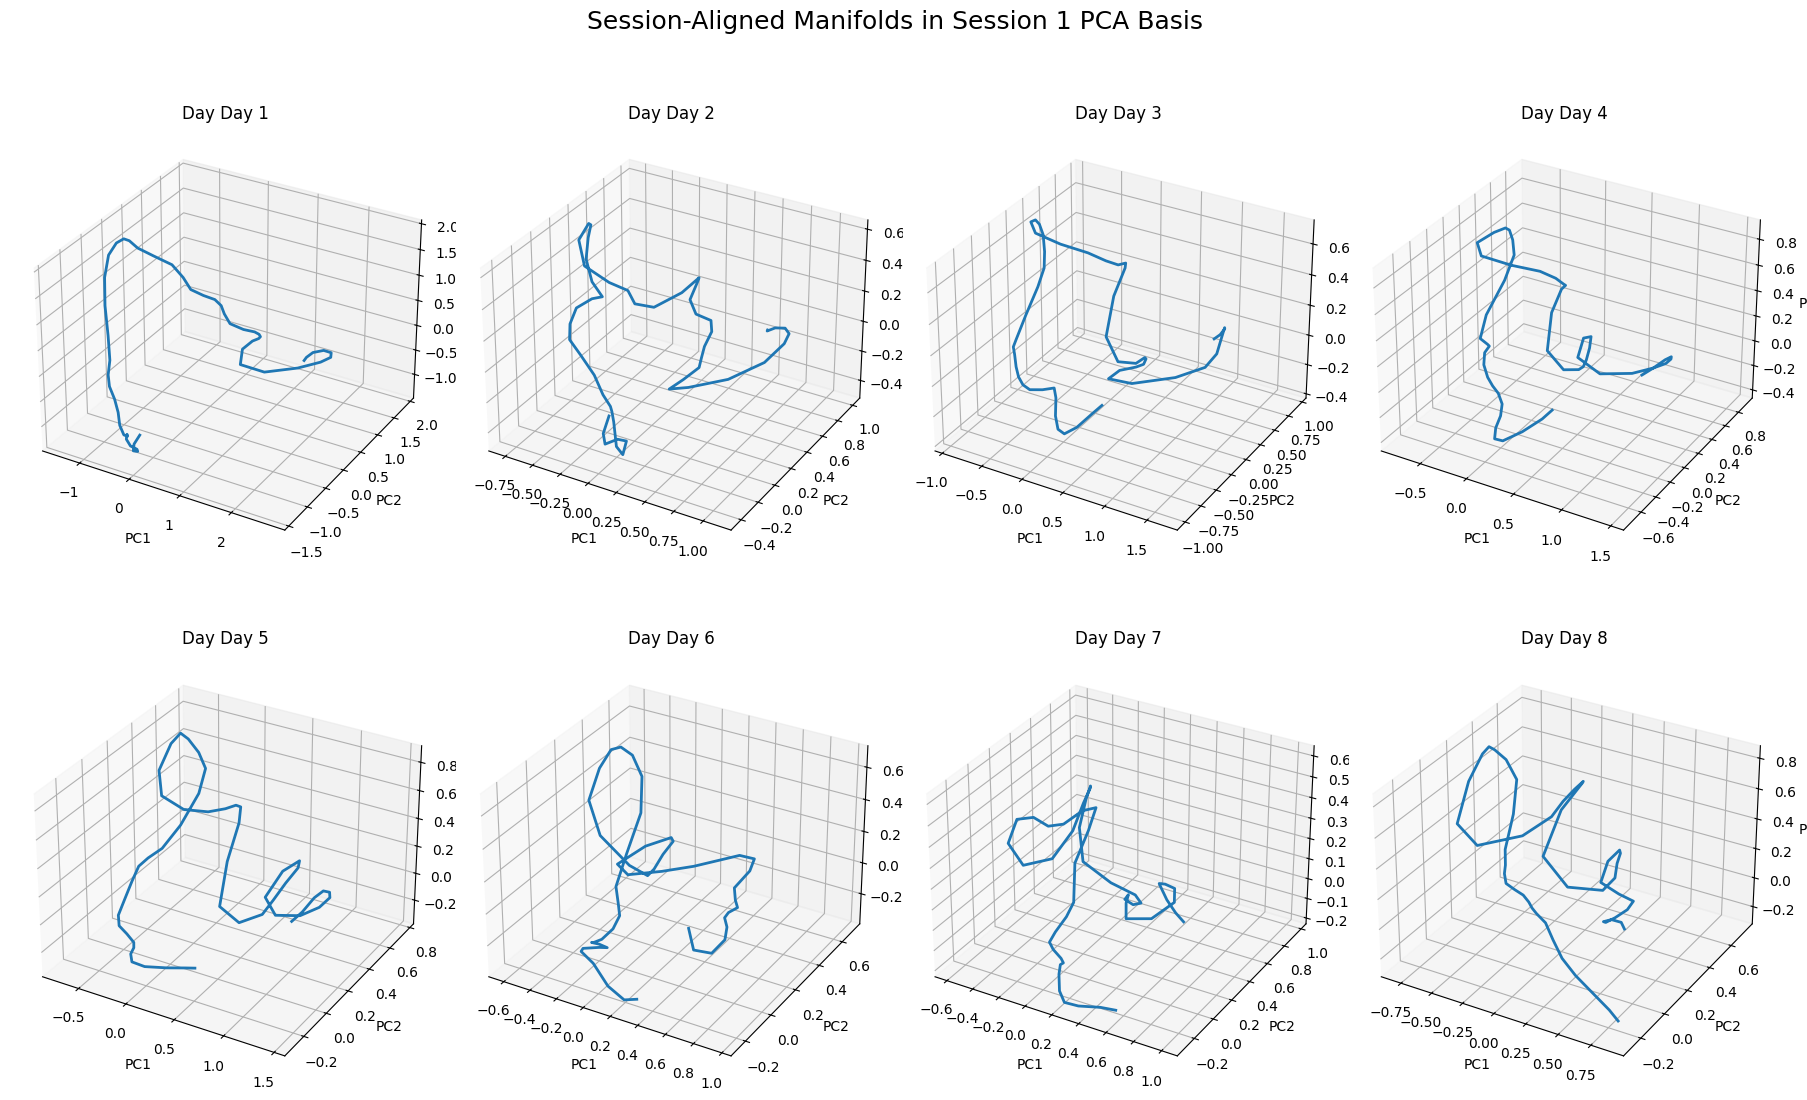

In [ ]:
plot_fixed_basis_manifold(all_smoothed_maps, PairedSessDays)


In [ ]:
from matplotlib import cm
from scipy.linalg import subspace_angles

def plot_fixed_basis_with_color_and_angle(all_smoothed_maps, PairedSessDays):
    n_sessions = len(all_smoothed_maps)
    n_bins = all_smoothed_maps[0].shape[1]

    # Step 1: Fit PCA on session 1
    X_ref = np.nan_to_num(all_smoothed_maps[0].T)  # [bins x neurons]
    pca_ref = PCA(n_components=3)
    X_ref_pca = pca_ref.fit_transform(X_ref)
    basis_ref = pca_ref.components_.T  # [neurons x 3]

    # Step 2: Plot each session in session 1 basis
    fig = plt.figure(figsize=(18, 12))
    cmap = cm.viridis(np.linspace(0, 1, n_bins))

    for sess_idx in range(n_sessions):
        X = np.nan_to_num(all_smoothed_maps[sess_idx].T)  # [bins x neurons]
        X_proj = pca_ref.transform(X)

        ax = fig.add_subplot(2, (n_sessions + 1) // 2, sess_idx + 1, projection='3d')
        for i in range(n_bins - 1):
            ax.plot(
                X_proj[i:i+2, 0], X_proj[i:i+2, 1], X_proj[i:i+2, 2],
                color=cmap[i], linewidth=2
            )

        ax.set_title(f"Day {PairedSessDays[sess_idx]}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_zlabel("PC3")

    fig.suptitle("Fixed PCA Basis from Session 1 (Colored by Position)", fontsize=18)
    plt.tight_layout()
    plt.show()

    # Step 3: Subspace angle calculation
    angles = []
    for sess_idx in range(1, n_sessions):
        X = np.nan_to_num(all_smoothed_maps[sess_idx].T)
        pca = PCA(n_components=3)
        pca.fit(X)
        basis_sess = pca.components_.T  # [neurons x 3]
        angle_deg = subspace_angles(basis_ref, basis_sess) * 180 / np.pi
        angles.append(angle_deg[:3])  # only first 3 angles

    # Plot subspace angles
    angles = np.array(angles)  # [n_sessions-1 x 3]
    plt.figure(figsize=(8, 4))
    for i in range(3):
        plt.plot(range(1, n_sessions), angles[:, i], label=f"Angle {i+1}")
    plt.xticks(range(1, n_sessions), PairedSessDays[1:])
    plt.ylabel("Principal Angle (deg)")
    plt.xlabel("Session")
    plt.title("Subspace Angles Between Session 1 and Other Sessions")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


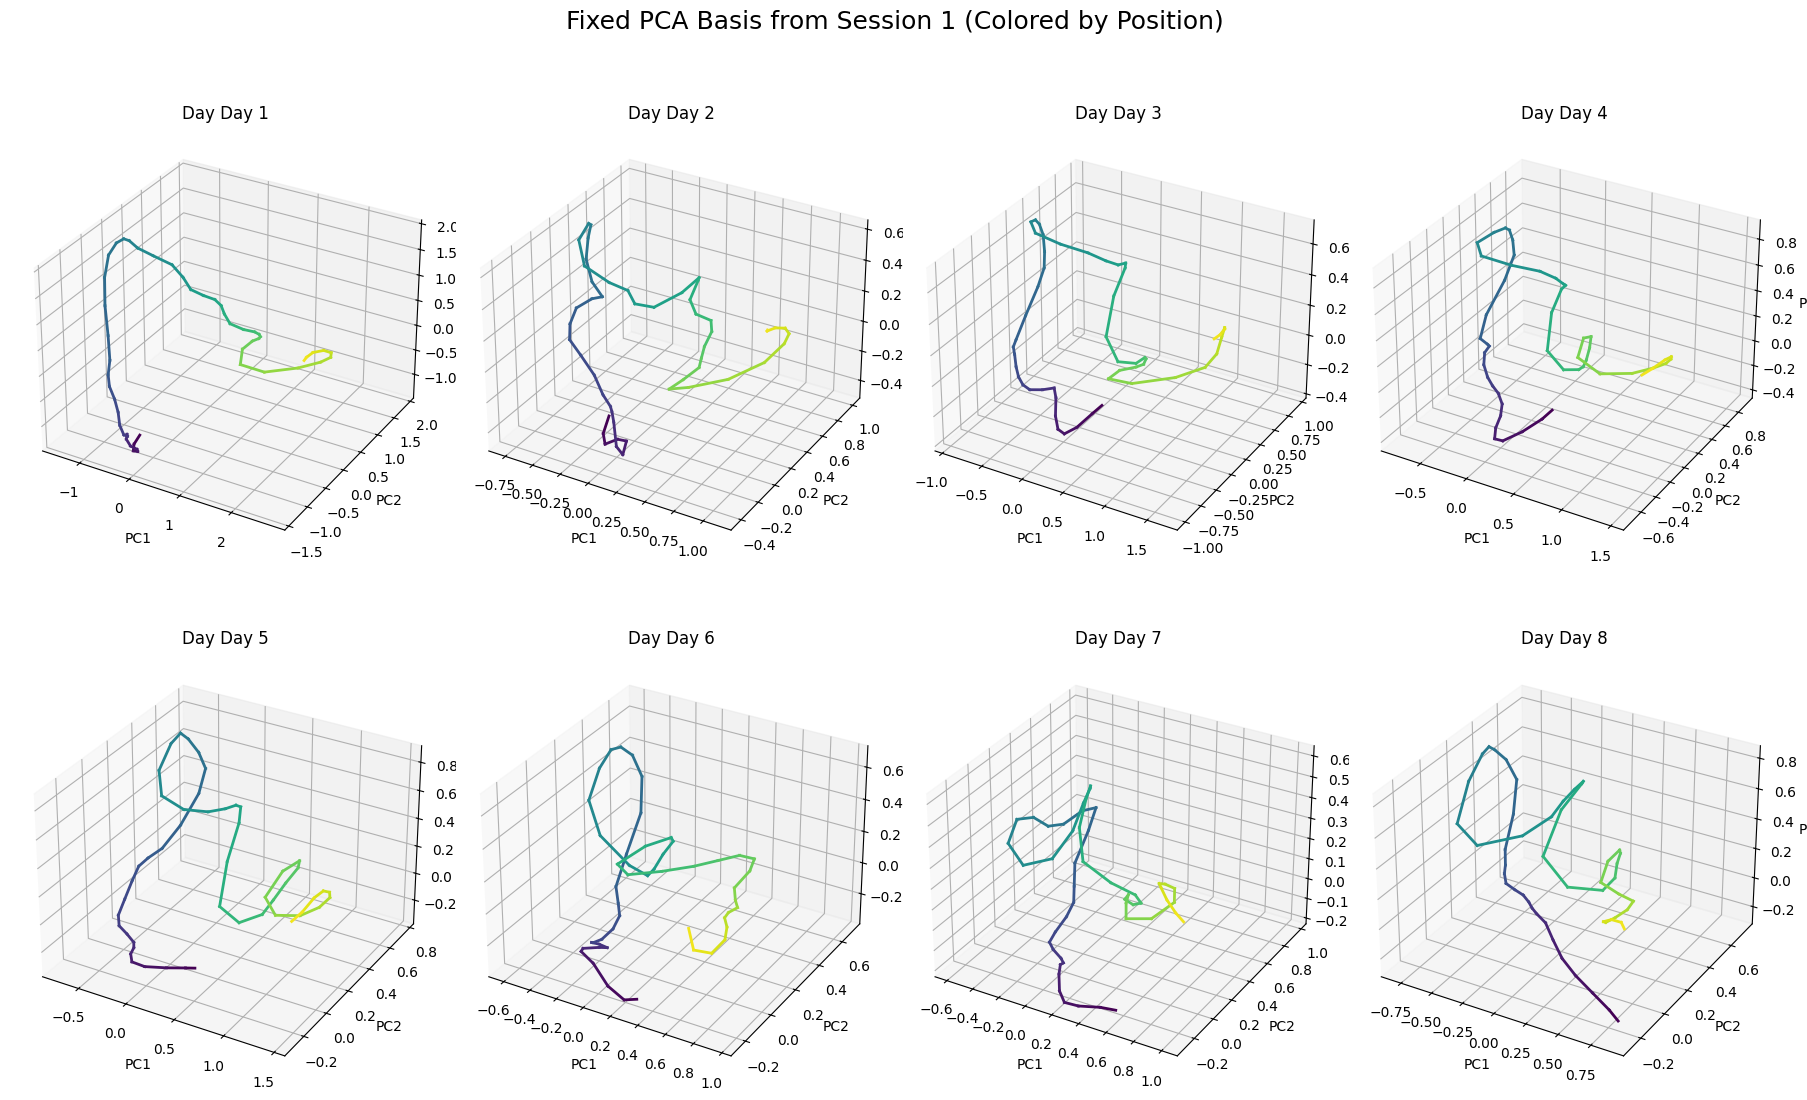

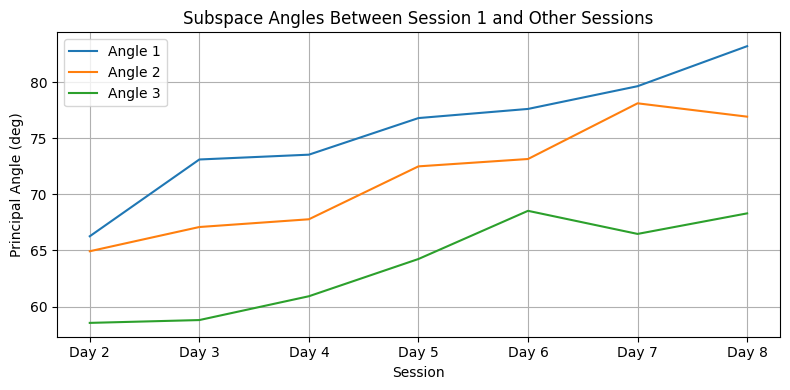

In [ ]:
plot_fixed_basis_with_color_and_angle(all_smoothed_maps, PairedSessDays)


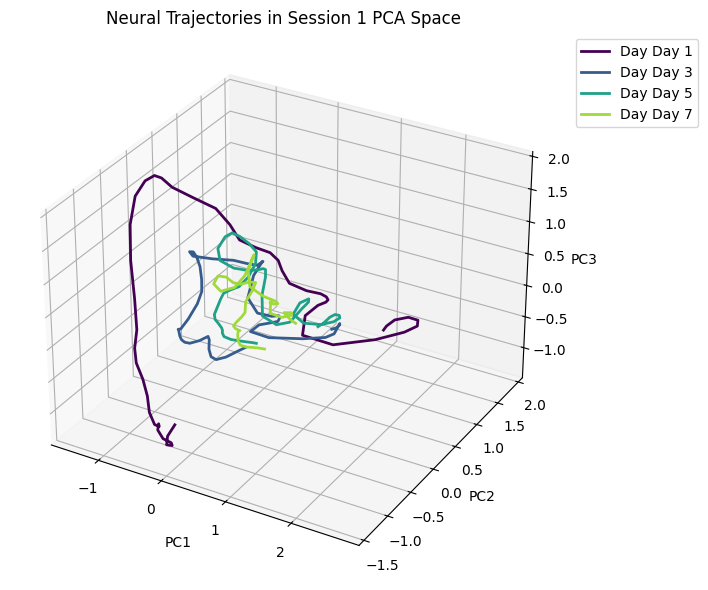

In [ ]:
def plot_all_trajectories_in_ref_space(all_smoothed_maps, PairedSessDays):
    n_sessions = len(all_smoothed_maps)
    n_bins = all_smoothed_maps[0].shape[1]

    # Fit PCA on session 1
    X_ref = np.nan_to_num(all_smoothed_maps[0].T)  # [bins x neurons]
    pca_ref = PCA(n_components=3)
    pca_ref.fit(X_ref)

    # Create color map per session
    colors = plt.cm.viridis(np.linspace(0, 1, n_sessions))
    

    # Plot all trajectories in one 3D plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # for sess_idx in range(n_sessions):
    for sess_idx in [0,2,4,6]:
        X = np.nan_to_num(all_smoothed_maps[sess_idx].T)
        X_proj = pca_ref.transform(X)
        ax.plot(X_proj[:, 0], X_proj[:, 1], X_proj[:, 2],
                color=colors[sess_idx], label=f'Day {PairedSessDays[sess_idx]}', linewidth=2)

    ax.set_title("Neural Trajectories in Session 1 PCA Space")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
    plt.tight_layout()
    plt.show()

plot_all_trajectories_in_ref_space(all_smoothed_maps, PairedSessDays)


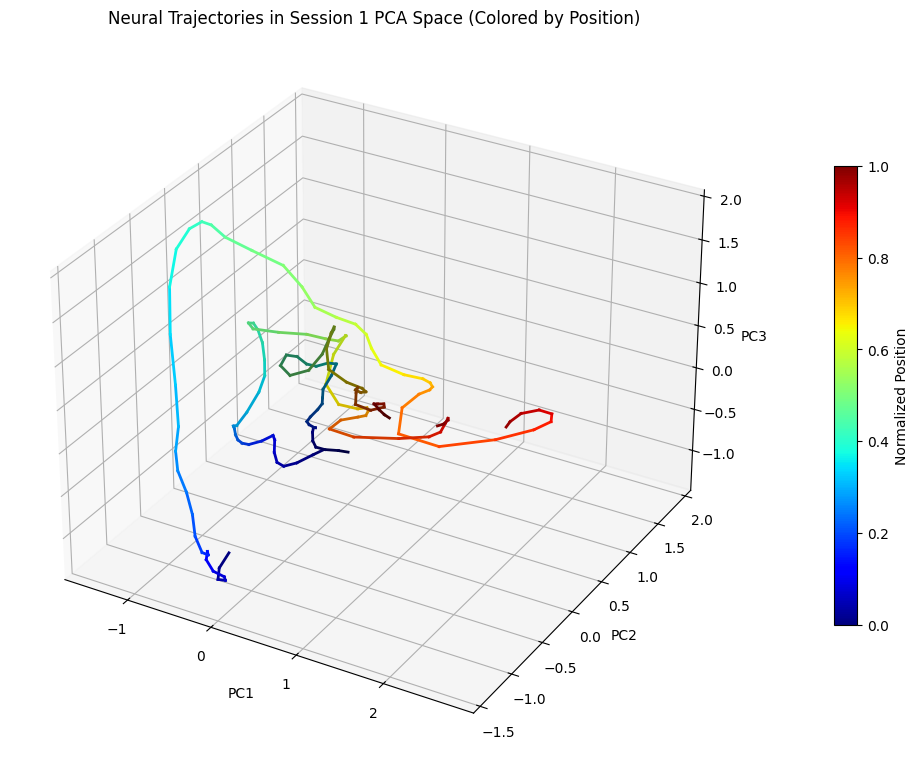

In [ ]:
def plot_all_trajectories_with_position_color(all_smoothed_maps, PairedSessDays):
    n_sessions = len(all_smoothed_maps)
    n_bins = all_smoothed_maps[0].shape[1]

    # Reference PCA from session 1
    X_ref = np.nan_to_num(all_smoothed_maps[0].T)  # [bins x neurons]
    pca_ref = PCA(n_components=3)
    pca_ref.fit(X_ref)

    # Jet colormap for position, faded darker for later sessions
    base_cmap = plt.cm.jet(np.linspace(0, 1, n_bins))

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # for sess_idx in range(n_sessions):
    for sess_idx in [0,2,6]:
        X = np.nan_to_num(all_smoothed_maps[sess_idx].T)
        X_proj = pca_ref.transform(X)

        # Fade colormap for later sessions
        fade = 1.0 - 0.6 * (sess_idx / (n_sessions - 1))  # 1 → 0.4
        faded_cmap = base_cmap * fade
        faded_cmap[:, 3] = 1.0  # keep alpha at 1

        for i in range(n_bins - 1):
            ax.plot(
                X_proj[i:i+2, 0],
                X_proj[i:i+2, 1],
                X_proj[i:i+2, 2],
                color=faded_cmap[i],
                linewidth=2
            )

    ax.set_title("Neural Trajectories in Session 1 PCA Space (Colored by Position)")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")

    sm = plt.cm.ScalarMappable(cmap="jet", norm=plt.Normalize(vmin=0, vmax=1))
    cbar = plt.colorbar(sm, ax=ax, pad=0.1, shrink=0.6)
    cbar.set_label("Normalized Position")

    plt.tight_layout()
    plt.show()

plot_all_trajectories_with_position_color(all_smoothed_maps, PairedSessDays)


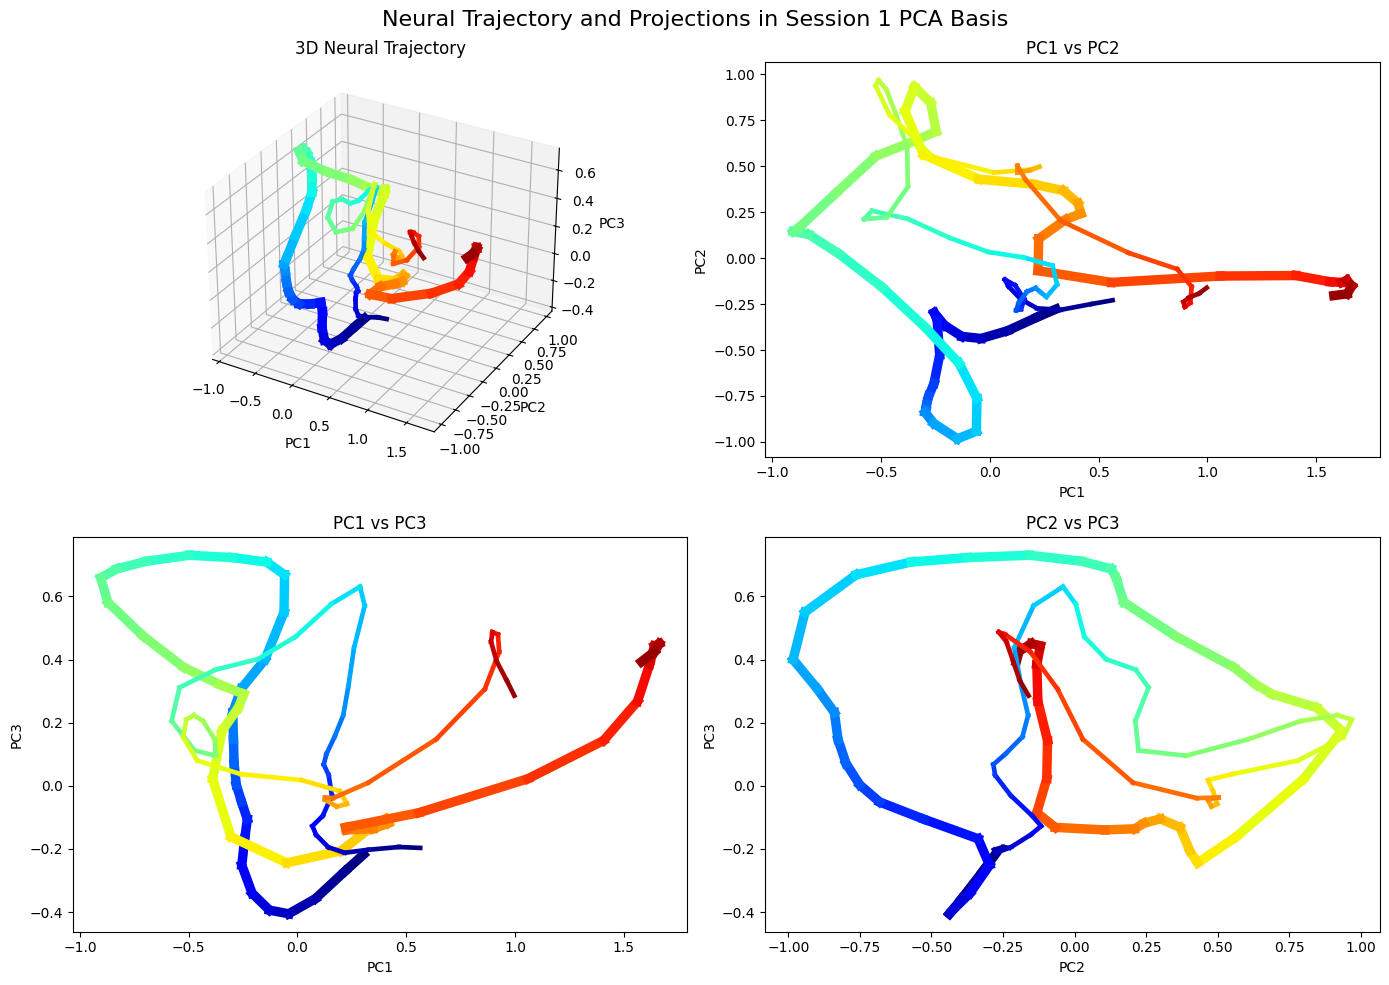

In [ ]:
def plot_trajectory_with_projections(all_smoothed_maps, PairedSessDays):
    n_sessions = len(all_smoothed_maps)
    n_bins = all_smoothed_maps[0].shape[1]

    # Reference PCA from session 1
    X_ref = np.nan_to_num(all_smoothed_maps[0].T)
    pca_ref = PCA(n_components=3)
    pca_ref.fit(X_ref)

    base_cmap = plt.cm.jet(np.linspace(0, 1, n_bins))

    fig = plt.figure(figsize=(14, 10))
    ax3d = fig.add_subplot(221, projection='3d')
    ax_xy = fig.add_subplot(222)
    ax_xz = fig.add_subplot(223)
    ax_yz = fig.add_subplot(224)

    for sess_idx in [2,6]:
        X = np.nan_to_num(all_smoothed_maps[sess_idx].T)
        X_proj = pca_ref.transform(X)
        lw = 8.5 - 6.0 * (sess_idx / (n_sessions - 1))  # line width

        for i in range(n_bins - 1):
            # 3D plot
            ax3d.plot(X_proj[i:i+2, 0], X_proj[i:i+2, 1], X_proj[i:i+2, 2],
                      color=base_cmap[i], linewidth=lw)

            # Projections
            ax_xy.plot(X_proj[i:i+2, 0], X_proj[i:i+2, 1],
                       color=base_cmap[i], linewidth=lw)
            ax_xz.plot(X_proj[i:i+2, 0], X_proj[i:i+2, 2],
                       color=base_cmap[i], linewidth=lw)
            ax_yz.plot(X_proj[i:i+2, 1], X_proj[i:i+2, 2],
                       color=base_cmap[i], linewidth=lw)

    ax3d.set_title("3D Neural Trajectory")
    ax3d.set_xlabel("PC1")
    ax3d.set_ylabel("PC2")
    ax3d.set_zlabel("PC3")

    ax_xy.set_title("PC1 vs PC2")
    ax_xy.set_xlabel("PC1")
    ax_xy.set_ylabel("PC2")

    ax_xz.set_title("PC1 vs PC3")
    ax_xz.set_xlabel("PC1")
    ax_xz.set_ylabel("PC3")

    ax_yz.set_title("PC2 vs PC3")
    ax_yz.set_xlabel("PC2")
    ax_yz.set_ylabel("PC3")

    fig.suptitle("Neural Trajectory and Projections in Session 1 PCA Basis", fontsize=16)
    plt.tight_layout()
    plt.show()

plot_trajectory_with_projections(all_smoothed_maps, PairedSessDays)
